<a href="https://colab.research.google.com/github/livieee/Software-Engineering-Management/blob/main/SEM_Project_Sprint_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()

Mon Nov 11 11:02:21 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

True

# 1. Import Dataset


Import datasets related to microglial activation and AD severity, including attributes like:
- Microglial gene expression (RNA-seq).
- Clinical markers of AD (Braak stage, CERAD score, etc.).
- APOE4 status, age at death, and other demographics.


Dataset: SEA-AD: Seattle Alzheimer’s Disease Brain Cell Atlas
- https://cellxgene.cziscience.com/collections/1ca90a2d-2943-483d-b678-b809bf464c30
1. Microglia-PVM - MTG: Seattle Alzheimer's Disease Atlas (SEA-AD)
2. Microglia-PVM - DLPFC: Seattle Alzheimer's Disease Atlas (SEA-AD)



In [ ]:
# Install scanpy if not installed
!pip install scanpy
!pip install scanpy anndata

In [ ]:
# Import libraries
import urllib.request
import scanpy as sc

# Download and load MTG dataset
urllib.request.urlretrieve(
    'https://datasets.cellxgene.cziscience.com/32b32549-9c68-453d-91c6-74acad9df928.h5ad',
    'Microglia_PVM_MTG.h5ad'
)
adata_mtg = sc.read_h5ad('Microglia_PVM_MTG.h5ad')
print("MTG Dataset:")
print(adata_mtg)

# Download and load DLPFC dataset
urllib.request.urlretrieve(
    'https://datasets.cellxgene.cziscience.com/6ea7ef32-8a23-40d2-8870-811df2fb2d53.h5ad',
    'Microglia_PVM_DLPFC.h5ad'
)
adata_dlpfc = sc.read_h5ad('Microglia_PVM_DLPFC.h5ad')
print("DLPFC Dataset:")
print(adata_dlpfc)

/usr/local/lib/python3.10/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import anndata.io.read_mtx instead.
  warnings.warn(msg, FutureWarning)
/usr

MTG Dataset:
AnnData object with n_obs × n_vars = 40000 × 36412
    obs: 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'Neurotypical reference', 'Class', 'Subclass', 'Supertype', 'Age at death', 'Years of education', 'Cognitive status', 'ADNC', 'Braak stage', 'Thal phase', 'CERAD score', 'APOE4 status', 'Lewy body disease pathology', 'LATE-NC stage', 'Microinfarct pathology', 'Specimen ID', 'donor_id', 'PMI', 'Number of UMIs', 'Genes detected', 'Fraction mitochrondrial UMIs', 'suspension_type', 'development_stage_ontology_term_id', 'Continuous Pseudo-progression Score', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature

In [ ]:
# Extract and display the values under each attribute in obs
# 2. mtg
for obs_attr in adata_mtg.obs.columns:
    print(f"\nValues for adata_mtg obs attribute '{obs_attr}':")
    print(adata_mtg.obs[obs_attr].values)

# Extract and display the values under each attribute in var
for var_attr in adata_mtg.var.columns:
    print(f"\nValues for adata_mtg var attribute '{var_attr}':")
    print(adata_mtg.var[var_attr].values)

# 2. dlpfc
# Extract and display the values under each attribute in obs
for obs_attr in adata_dlpfc.obs.columns:
    print(f"\nValues for adata_dlpfc obs attribute '{obs_attr}':")
    print(adata_mtg.obs[obs_attr].values)

# Extract and display the values under each attribute in var
for var_attr in adata_dlpfc.var.columns:
    print(f"\nValues for adata_dlpfc var attribute '{var_attr}':")
    print(adata_mtg.var[var_attr].values)


Values for adata_mtg obs attribute 'assay_ontology_term_id':
['EFO:0009922', 'EFO:0009922', 'EFO:0009922', 'EFO:0009922', 'EFO:0009922', ..., 'EFO:0009922', 'EFO:0009922', 'EFO:0009922', 'EFO:0009922', 'EFO:0009922']
Length: 40000
Categories (2, object): ['EFO:0009922', 'EFO:0030059']

Values for adata_mtg obs attribute 'cell_type_ontology_term_id':
['CL:0000129', 'CL:0000129', 'CL:0000129', 'CL:0000129', 'CL:0000129', ..., 'CL:0000129', 'CL:0000129', 'CL:0000129', 'CL:0000129', 'CL:0000129']
Length: 40000
Categories (1, object): ['CL:0000129']

Values for adata_mtg obs attribute 'disease_ontology_term_id':
['MONDO:0001627', 'PATO:0000461', 'MONDO:0001627', 'PATO:0000461', 'PATO:0000461', ..., 'PATO:0000461', 'MONDO:0001627', 'MONDO:0001627', 'MONDO:0001627', 'PATO:0000461']
Length: 40000
Categories (2, object): ['MONDO:0001627', 'PATO:0000461']

Values for adata_mtg obs attribute 'self_reported_ethnicity_ontology_term_id':
['HANCESTRO:0005', 'HANCESTRO:0005', 'HANCESTRO:0005', 'HANCE

# 1. Data Preprocessing


## a. Quality Control (QC):


Filter Out Low-Quality Cells:
*   Remove cells with a low number of genes detected (Genes detected).
*   Exclude cells with extremely high or low Number of UMIs to avoid doublets or dead cells.
*   Filter out cells with high Fraction mitochondrial UMIs as this indicates cell
*   Filter out cells with high Fraction mitochondrial UMIs as this indicates cell stress or apoptosis.




Filtering low-quality cells in MTG dataset...


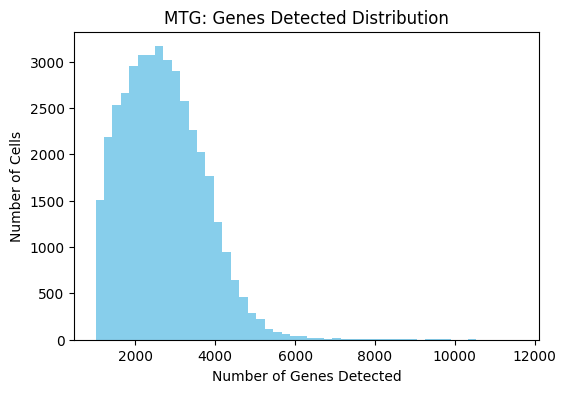

Cells with at least 500 genes detected: 40000


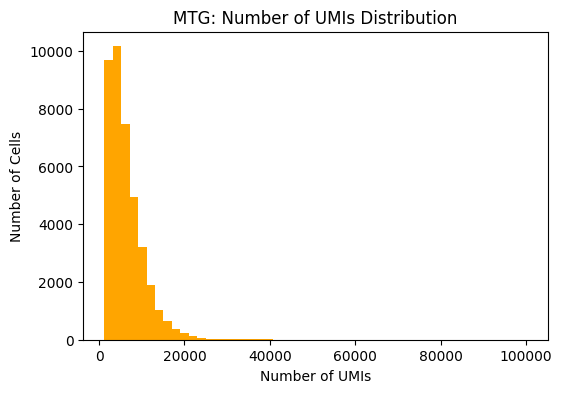

Cells with UMIs between 1000 and 25000: 39820


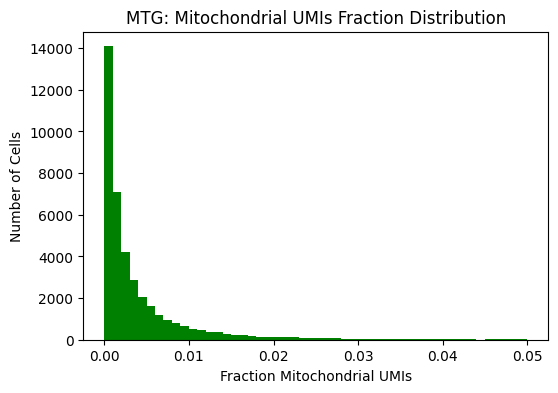

Cells with mitochondrial fraction ≤ 0.05: 39820
Final number of high-quality cells in MTG: 39820

Filtering low-quality cells in DLPFC dataset...


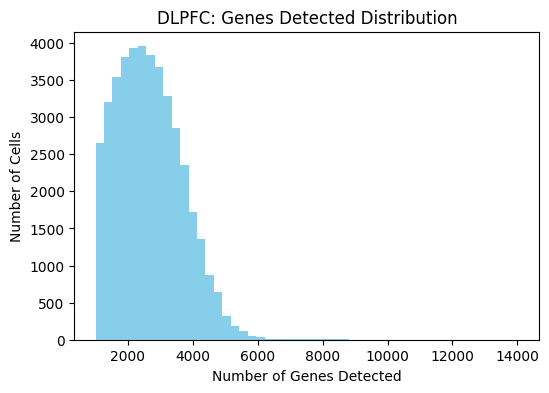

Cells with at least 500 genes detected: 42486


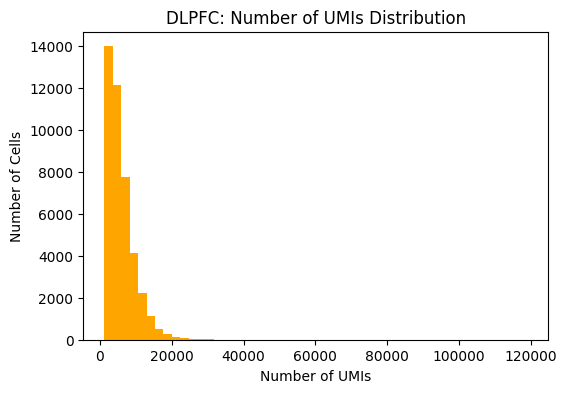

Cells with UMIs between 1000 and 25000: 42404


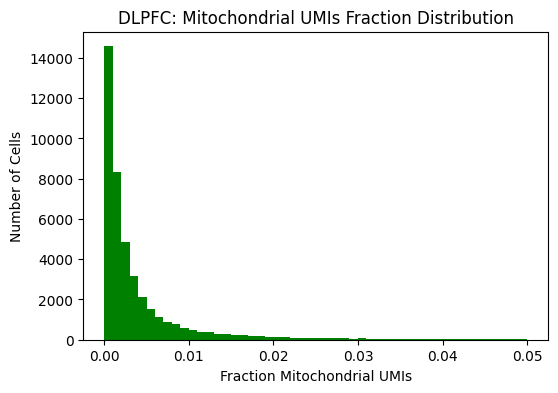

Cells with mitochondrial fraction ≤ 0.05: 42404
Final number of high-quality cells in DLPFC: 42404


In [ ]:
import matplotlib.pyplot as plt

# Function to filter out low-quality cells
def filter_low_quality_cells(adata, dataset_name):
    print(f"\nFiltering low-quality cells in {dataset_name} dataset...")

    # Plot histogram of 'Genes detected' to decide on a minimum threshold
    plt.figure(figsize=(6, 4))
    plt.hist(adata.obs['Genes detected'], bins=50, color='skyblue')  # Reduced bins to 50
    plt.xlabel('Number of Genes Detected')
    plt.ylabel('Number of Cells')
    plt.title(f'{dataset_name}: Genes Detected Distribution')
    plt.show()
    plt.close()  # Clear figure to reduce memory usage

    # Set a minimum number of genes detected per cell
    min_genes = 500  # Adjust this threshold based on the histogram
    adata = adata[adata.obs['Genes detected'] >= min_genes, :]
    print(f"Cells with at least {min_genes} genes detected: {adata.n_obs}")

    # Plot histogram of 'Number of UMIs' to decide on thresholds
    plt.figure(figsize=(6, 4))
    plt.hist(adata.obs['Number of UMIs'], bins=50, color='orange')  # Reduced bins to 50
    plt.xlabel('Number of UMIs')
    plt.ylabel('Number of Cells')
    plt.title(f'{dataset_name}: Number of UMIs Distribution')
    plt.show()
    plt.close()  # Clear figure to reduce memory usage

    # Set thresholds for UMIs to exclude doublets or dead cells
    min_umis = 1000   # Adjust based on the histogram
    max_umis = 25000  # Adjust based on the histogram
    adata = adata[(adata.obs['Number of UMIs'] >= min_umis) & (adata.obs['Number of UMIs'] <= max_umis), :]
    print(f"Cells with UMIs between {min_umis} and {max_umis}: {adata.n_obs}")

    # Plot histogram of 'Fraction mitochondrial UMIs' to decide on a maximum threshold
    plt.figure(figsize=(6, 4))
    plt.hist(adata.obs['Fraction mitochrondrial UMIs'], bins=50, color='green')  # Reduced bins to 50
    plt.xlabel('Fraction Mitochondrial UMIs')
    plt.ylabel('Number of Cells')
    plt.title(f'{dataset_name}: Mitochondrial UMIs Fraction Distribution')
    plt.show()
    plt.close()  # Clear figure to reduce memory usage

    # Set a maximum acceptable mitochondrial fraction
    max_mito = 0.05  # Typically between 5% and 10%
    adata = adata[adata.obs['Fraction mitochrondrial UMIs'] <= max_mito, :]
    print(f"Cells with mitochondrial fraction ≤ {max_mito}: {adata.n_obs}")

    print(f"Final number of high-quality cells in {dataset_name}: {adata.n_obs}")
    return adata

# Apply the filtering function on the datasets
try:
    adata_mtg_filtered = filter_low_quality_cells(adata_mtg, 'MTG')
    adata_dlpfc_filtered = filter_low_quality_cells(adata_dlpfc, 'DLPFC')
except MemoryError:
    print("The session ran out of memory. Please try further reducing the dataset size or consider sampling.")



*   Normalize Data:
*   Use methods like log-normalization to make gene expression levels comparable across cells.
*   Implement scaling to adjust for differences in sequencing depth.





## b. Batch Correction:

Identify Batches:


*   Use metadata like Specimen ID or donor_id to identify different batches or donors.




Processing MTG dataset...

MTG Dataset Batch Information:
Batch Information (using 'Specimen ID'): 
 Specimen ID
M2TX_210329_202_F01      582
M1TX_210816_161_F01      491
M1TX_210816_161_E01      481
M2TX_210426_208_A01      463
M2TX_210624_205_D01      461
                        ... 
M2TX_210316_204_E01       12
M1TX_190916_106_B01        5
M2XM_210924_211-R_A01      3
M1TX_190822_101_D01        1
M1TX_191216_107_D01        1
Name: count, Length: 227, dtype: int64


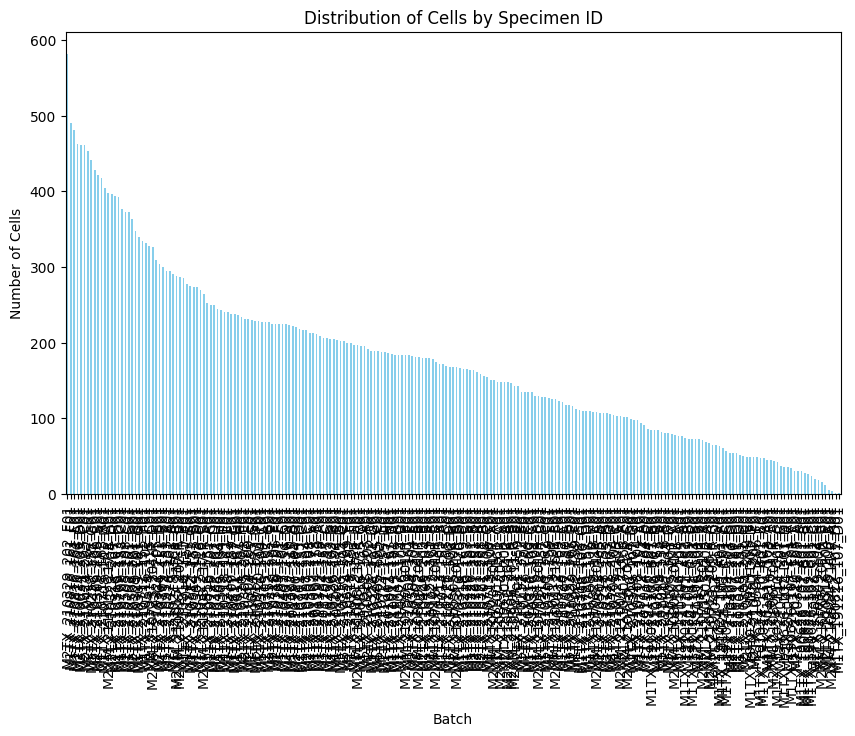

In [ ]:
# Function to identify batch information
def identify_batch_info(adata, batch_key='Specimen ID', plot=True):
    # Verify batch key exists
    if batch_key not in adata.obs.columns:
        raise ValueError(f"Batch key '{batch_key}' not found in metadata")

    # Get batch information
    batch_info = adata.obs[batch_key].value_counts()
    print(f"Batch Information (using '{batch_key}'): \n", batch_info)

    # Optionally plot batch distribution
    if plot:
        plt.figure(figsize=(10, 6))
        batch_info.plot(kind='bar', color='skyblue')
        plt.xlabel('Batch')
        plt.ylabel('Number of Cells')
        plt.title(f'Distribution of Cells by {batch_key}')
        plt.show()

    return batch_info

# Call the function with corrected batch key
try:
    print("Processing MTG dataset...")
    print("\nMTG Dataset Batch Information:")
    mtg_batches = identify_batch_info(adata_mtg, batch_key='Specimen ID')
except ValueError as e:
    print(e)


	•	Apply Correction Methods:
	•	Use tools like Harmony, ComBat, or Scanorama to correct for batch effects.

# 2. Data Analysis

## Step 1.1: Examine Dataset Composition
- A summary dictionary of dataset overview information.
- Count distributions for Braak stage, APOE4 status, and Age at death.

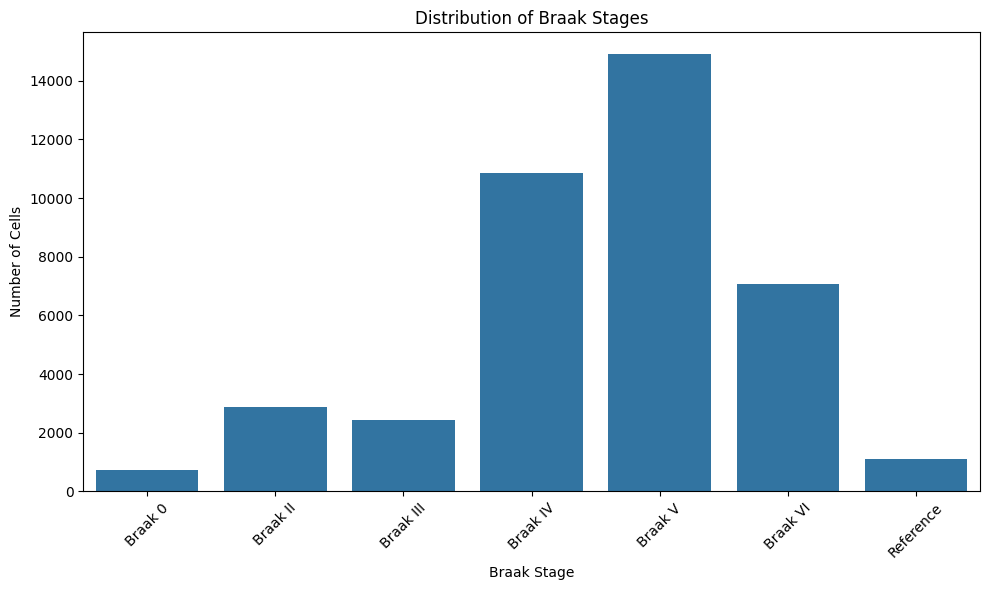

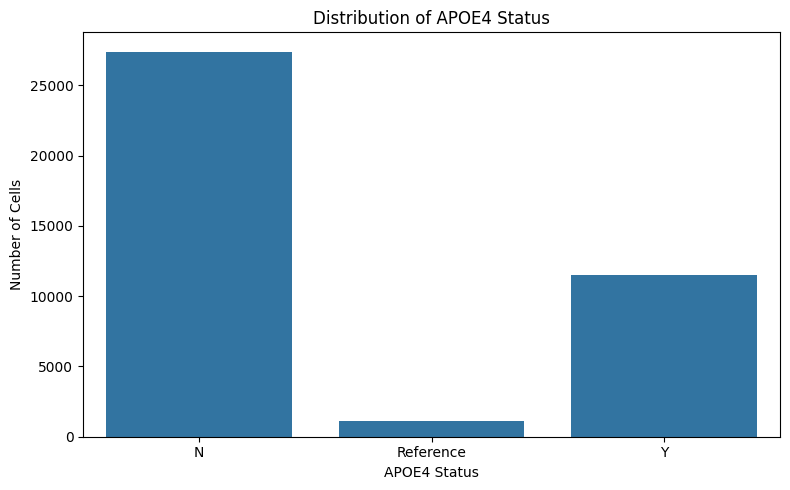

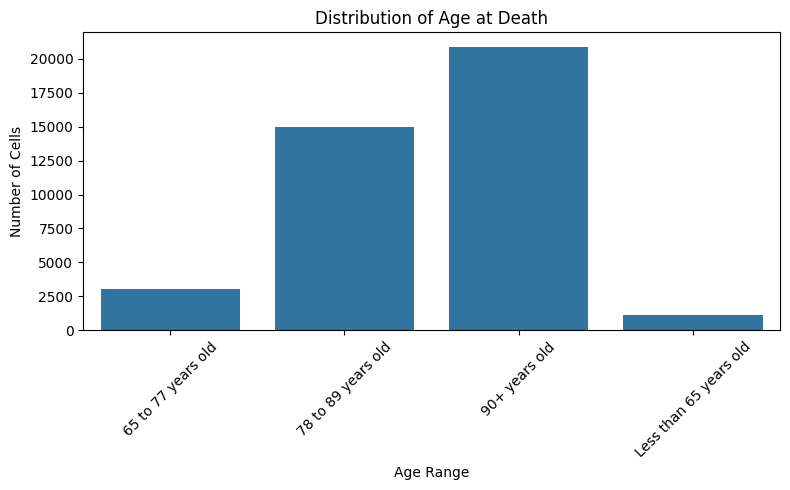

({'Number of Cells': 40000,
  'Number of Genes': 36412,
  'Available Observations Metadata': ['assay_ontology_term_id',
   'cell_type_ontology_term_id',
   'disease_ontology_term_id',
   'self_reported_ethnicity_ontology_term_id',
   'organism_ontology_term_id',
   'sex_ontology_term_id',
   'tissue_ontology_term_id',
   'is_primary_data',
   'Neurotypical reference',
   'Class',
   'Subclass',
   'Supertype',
   'Age at death',
   'Years of education',
   'Cognitive status',
   'ADNC',
   'Braak stage',
   'Thal phase',
   'CERAD score',
   'APOE4 status',
   'Lewy body disease pathology',
   'LATE-NC stage',
   'Microinfarct pathology',
   'Specimen ID',
   'donor_id',
   'PMI',
   'Number of UMIs',
   'Genes detected',
   'Fraction mitochrondrial UMIs',
   'suspension_type',
   'development_stage_ontology_term_id',
   'Continuous Pseudo-progression Score',
   'tissue_type',
   'cell_type',
   'assay',
   'disease',
   'organism',
   'sex',
   'tissue',
   'self_reported_ethnicity',


In [ ]:
# Basic overview of the dataset
adata_mtg_overview = {
    "Number of Cells": adata_mtg.n_obs,
    "Number of Genes": adata_mtg.n_vars,
    "Available Observations Metadata": list(adata_mtg.obs.columns),
    "Available Features Metadata": list(adata_mtg.var.columns)
}

# Distribution of 'Braak stage' in the dataset
braak_stage_counts = adata_mtg.obs['Braak stage'].value_counts()

# Distribution of 'APOE4 status' in the dataset
apoe4_status_counts = adata_mtg.obs['APOE4 status'].value_counts()

# Visualize 'Braak stage' distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=adata_mtg.obs, x='Braak stage', order=sorted(adata_mtg.obs['Braak stage'].unique()))
plt.title('Distribution of Braak Stages')
plt.xlabel('Braak Stage')
plt.ylabel('Number of Cells')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize 'APOE4 status' distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=adata_mtg.obs, x='APOE4 status', order=sorted(adata_mtg.obs['APOE4 status'].unique()))
plt.title('Distribution of APOE4 Status')
plt.xlabel('APOE4 Status')
plt.ylabel('Number of Cells')
plt.tight_layout()
plt.show()

# Summarize 'Age at death' distribution
age_distribution = adata_mtg.obs['Age at death'].value_counts()

# Visualize 'Age at death' distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=adata_mtg.obs, x='Age at death', order=sorted(adata_mtg.obs['Age at death'].unique()))
plt.title('Distribution of Age at Death')
plt.xlabel('Age Range')
plt.ylabel('Number of Cells')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Return summary statistics and distributions
adata_mtg_overview, braak_stage_counts, apoe4_status_counts, age_distribution

## Step 1.2 Basic Demographics of ADNC Score

**General Trends:**

ADNC Scores and **Age**: Higher ADNC scores are correlated with older development stages (ages), which aligns with Alzheimer’s being an age-related disorder.

ADNC Scores and **Gender**: Gender distribution varies, with females more prevalent in higher ADNC scores, possibly reflecting population-level gender differences in Alzheimer's prevalence.

ADNC Scores and **APOE4**: Higher ADNC scores contains higher percentage of APOE4 carriers than lower scores, suggesting APOE4's strong association with higher ADNC stages.

<ipython-input-56-651a5d49ad6f>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


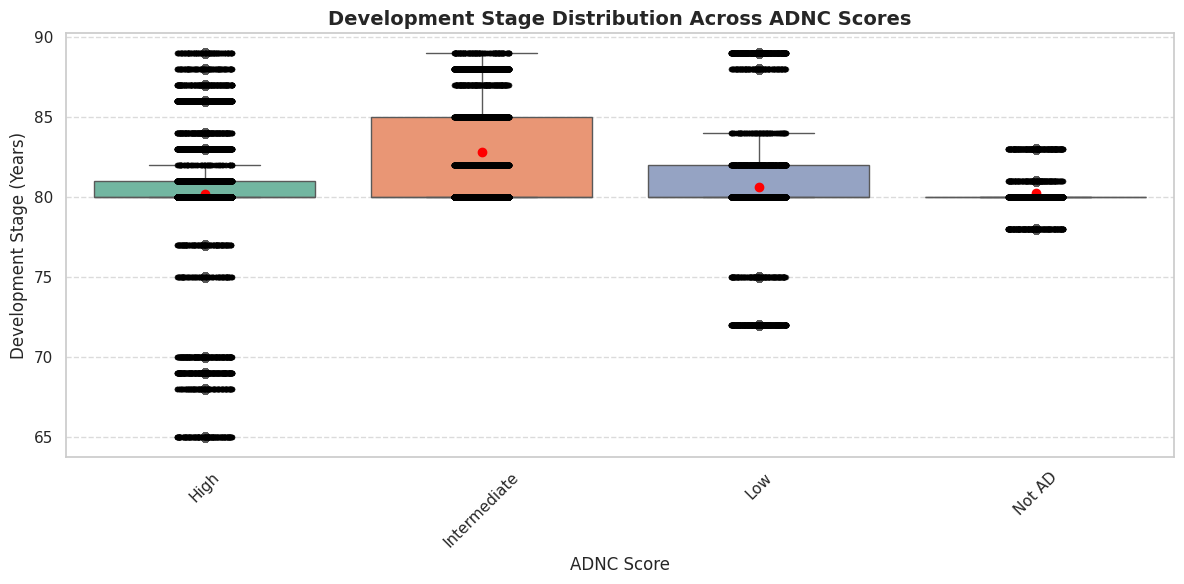

<ipython-input-56-651a5d49ad6f>:72: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_counts = mtg_obs.groupby(['ADNC', 'sex']).size().unstack(fill_value=0)


<Figure size 800x400 with 0 Axes>

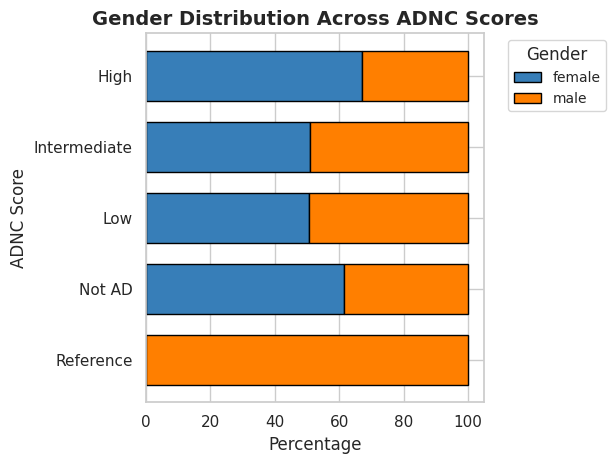

<ipython-input-56-651a5d49ad6f>:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  apoe_counts = mtg_obs.groupby(['ADNC', 'APOE4 status']).size().unstack(fill_value=0)


<Figure size 800x400 with 0 Axes>

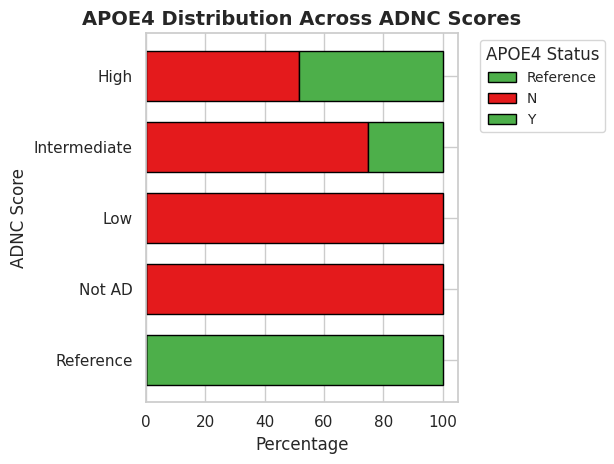

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `mtg_obs` is the DataFrame that contains the required data

# Set consistent style for the visualization
sns.set(style="whitegrid", palette="muted")

# Plot 1: Age (Development Stage) Distribution Across ADNC Scores

# Create a mapping of development stage strings to numeric values
development_stage_mapping = {
    '29-year-old stage': 29,
    '43-year-old stage': 43,
    '50-year-old stage': 50,
    '60-year-old stage': 60,
    '65-year-old stage': 65,
    '68-year-old stage': 68,
    '69-year-old stage': 69,
    '70-year-old stage': 70,
    '72-year-old stage': 72,
    '75-year-old stage': 75,
    '77-year-old stage': 77,
    '78-year-old stage': 78,
    '80 year-old and over stage': 80,
    '81-year-old stage': 81,
    '82-year-old stage': 82,
    '83-year-old stage': 83,
    '84-year-old stage': 84,
    '85-year-old stage': 85,
    '86-year-old stage': 86,
    '87-year-old stage': 87,
    '88-year-old stage': 88,
    '89-year-old stage': 89,
    'adult stage': 30  # Approximation for 'adult stage'
}

# Map the development stage strings to numbers
mtg_obs['Development Stage Numeric'] = mtg_obs['development_stage'].map(development_stage_mapping)

# Plot with numeric values
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=mtg_obs,
    x='ADNC',
    y='Development Stage Numeric',
    order=['High', 'Intermediate', 'Low', 'Not AD'],
    palette='Set2',
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "red"}
)
sns.stripplot(
    data=mtg_obs,
    x='ADNC',
    y='Development Stage Numeric',
    jitter=True,
    size=4,
    alpha=0.6,
    color='black',
    order=['High', 'Intermediate', 'Low', 'Not AD']
)
plt.title("Development Stage Distribution Across ADNC Scores", fontsize=14, fontweight='bold')
plt.xlabel("ADNC Score", fontsize=12)
plt.ylabel("Development Stage (Years)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot 2: Gender Distribution Across ADNC Scores
gender_counts = mtg_obs.groupby(['ADNC', 'sex']).size().unstack(fill_value=0)
gender_percentages = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(8, 4))
gender_percentages.plot(kind='barh', stacked=True, color=['#377eb8', '#ff7f00'], edgecolor='black', width=0.7)
plt.title("Gender Distribution Across ADNC Scores", fontsize=14, fontweight='bold')
plt.xlabel("Percentage", fontsize=12)
plt.ylabel("ADNC Score", fontsize=12)
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

# Plot 3: APOE4 Distribution Across ADNC Scores
apoe_counts = mtg_obs.groupby(['ADNC', 'APOE4 status']).size().unstack(fill_value=0)
apoe_percentages = apoe_counts.div(apoe_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(8, 4))
apoe_percentages.plot(kind='barh', stacked=True, color=['#4daf4a', '#e41a1c'], edgecolor='black', width=0.7)
plt.title("APOE4 Distribution Across ADNC Scores", fontsize=14, fontweight='bold')
plt.xlabel("Percentage", fontsize=12)
plt.ylabel("ADNC Score", fontsize=12)
plt.legend(title="APOE4 Status", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


## Step 1.3 AD Neuropathological Stages VS. ADNC Scores

**Braak Staging**: Higher ADNC severity correlates with advanced Braak stages, indicating increased neurofibrillary tangle accumulation. "High" ADNC has significant representation in Braak V and VI stages, while "Not AD" and "Low" ADNC are primarily in early stages (Braak II, III).

**Thal Phasing:** Similar trends are observed for amyloid-beta deposition. Higher ADNC severity aligns with advanced Thal phases (Thal 4 and 5). Lower ADNC groups exhibit early Thal phases, indicating less amyloid-beta burden.

**CERAD Score:** The "High" ADNC group predominantly has "Frequent" neuritic plaques, indicating severe pathology. Intermediate ADNC groups show a mixture of "Moderate" and "Sparse" scores, while "Not AD" shows mostly absent plaques.


**Dementia**: The prevalence of dementia increases with ADNC severity, indicating a direct relationship between Alzheimer's pathology and cognitive decline.


<ipython-input-48-a36d084ad1e1>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  braak_staging = mtg_obs.groupby(['ADNC', 'Braak stage']).size().unstack(fill_value=0)


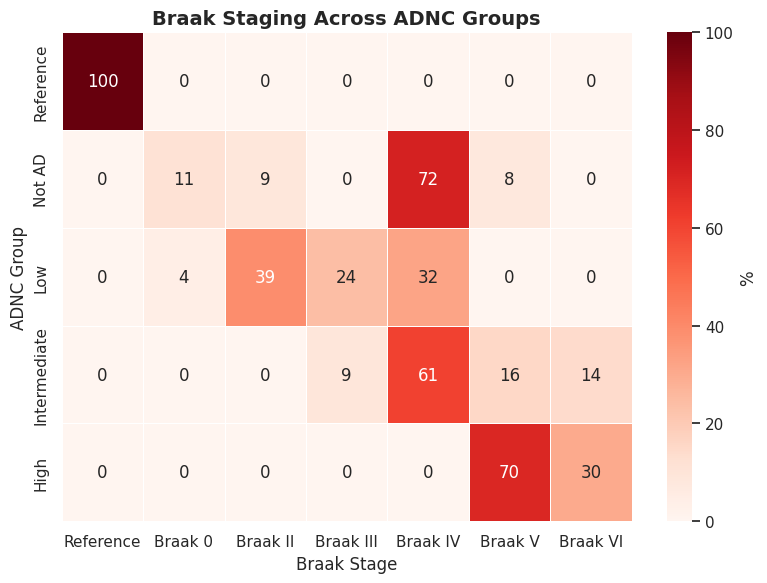

<ipython-input-48-a36d084ad1e1>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  thal_phasing = mtg_obs.groupby(['ADNC', 'Thal phase']).size().unstack(fill_value=0)


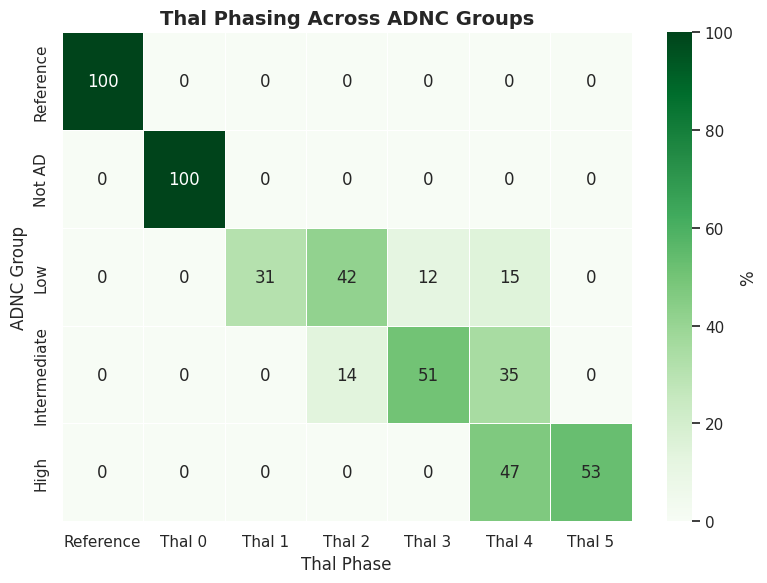

<ipython-input-48-a36d084ad1e1>:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cerad_score = mtg_obs.groupby(['ADNC', 'CERAD score']).size().unstack(fill_value=0)


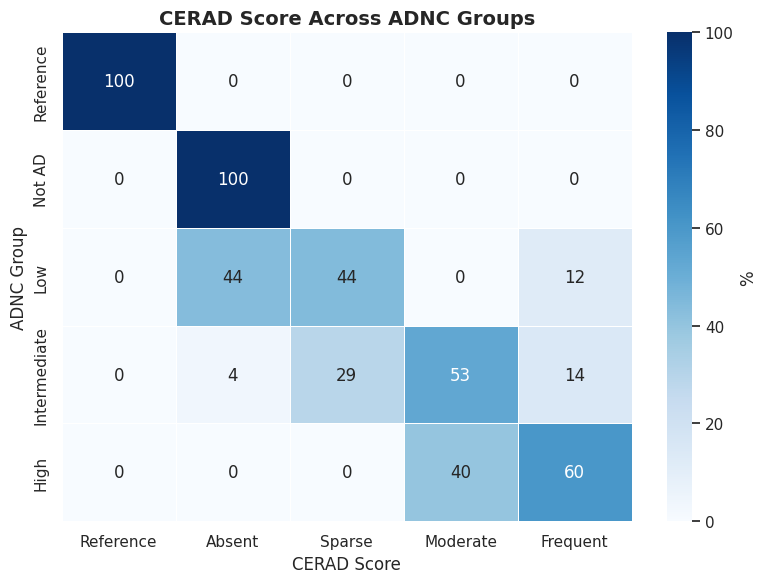

<ipython-input-48-a36d084ad1e1>:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dementia_counts = mtg_obs.groupby(['ADNC', 'Cognitive status']).size().unstack(fill_value=0)


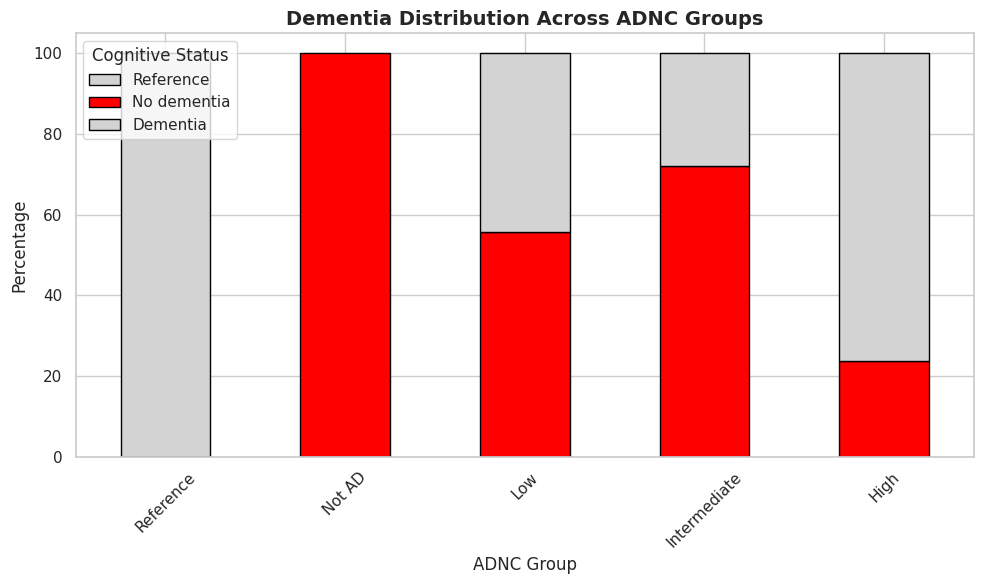

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming `mtg_obs` is the DataFrame from the provided data

# 1. Heatmap for Braak Staging
braak_staging = mtg_obs.groupby(['ADNC', 'Braak stage']).size().unstack(fill_value=0)
braak_percentage = braak_staging.div(braak_staging.sum(axis=1), axis=0) * 100

plt.figure(figsize=(8, 6))
sns.heatmap(braak_percentage, annot=True, fmt=".0f", cmap="Reds", cbar_kws={'label': '%'}, linewidths=0.5)
plt.title("Braak Staging Across ADNC Groups", fontsize=14, fontweight='bold')
plt.xlabel("Braak Stage")
plt.ylabel("ADNC Group")
plt.tight_layout()
plt.show()

# 2. Heatmap for Thal Phasing
thal_phasing = mtg_obs.groupby(['ADNC', 'Thal phase']).size().unstack(fill_value=0)
thal_percentage = thal_phasing.div(thal_phasing.sum(axis=1), axis=0) * 100

plt.figure(figsize=(8, 6))
sns.heatmap(thal_percentage, annot=True, fmt=".0f", cmap="Greens", cbar_kws={'label': '%'}, linewidths=0.5)
plt.title("Thal Phasing Across ADNC Groups", fontsize=14, fontweight='bold')
plt.xlabel("Thal Phase")
plt.ylabel("ADNC Group")
plt.tight_layout()
plt.show()

# 3. Heatmap for CERAD Score
cerad_score = mtg_obs.groupby(['ADNC', 'CERAD score']).size().unstack(fill_value=0)
cerad_percentage = cerad_score.div(cerad_score.sum(axis=1), axis=0) * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cerad_percentage, annot=True, fmt=".0f", cmap="Blues", cbar_kws={'label': '%'}, linewidths=0.5)
plt.title("CERAD Score Across ADNC Groups", fontsize=14, fontweight='bold')
plt.xlabel("CERAD Score")
plt.ylabel("ADNC Group")
plt.tight_layout()
plt.show()

# 4. Stacked Bar Plot for Dementia
dementia_counts = mtg_obs.groupby(['ADNC', 'Cognitive status']).size().unstack(fill_value=0)
dementia_percentage = dementia_counts.div(dementia_counts.sum(axis=1), axis=0) * 100

dementia_percentage.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['lightgrey', 'red'],
    edgecolor='black'
)
plt.title("Dementia Distribution Across ADNC Groups", fontsize=14, fontweight='bold')
plt.xlabel("ADNC Group")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.legend(title="Cognitive Status", loc='upper left')
plt.tight_layout()
plt.show()

## Step 2: Dataset Filtering and Preparation
We focus on the MTG dataset (adata_mtg) and isolate relevant observations and features:

Groups: Early AD and Late AD based on Braak stages.

Key genes: Inflammatory pathway genes, genes linked to amyloid-beta clearance, and APOE4 status.

In [59]:
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Map Braak stages to Early and Late AD
braak_to_ad_stage = {
    'Braak 0': 'Early AD',
    'Braak II': 'Early AD',
    'Braak III': 'Early AD',
    'Braak IV': 'Late AD',
    'Braak V': 'Late AD',
    'Braak VI': 'Late AD'
}
adata_mtg.obs['AD Stage'] = adata_mtg.obs['Braak stage'].map(braak_to_ad_stage)

# Filter for valid AD stages
adata_filtered = adata_mtg[adata_mtg.obs['AD Stage'].notnull()]


## Step 3: Differential Expression Analysis
Compare Early AD vs. Late AD to identify differentially expressed genes.

**Early AD vs. Rest**

Top Gene: ENSG00000152128 (TMEM163) shows the highest expression in early AD stages, indicating its potential importance in early inflammatory responses or early neuroprotective mechanisms. Studies suggest TMEM163 might regulate the synaptic vesicle cycle, which could be disrupted during early AD pathology.

Other Significant Genes:
ENSG00000187672 (ERC2) also show higher differential expression. ERC2, which encodes for a presynaptic protein, might be critical in maintaining synaptic function during early disease stages.



**Late AD vs. Rest**

Top Gene: ENSG00000112576 (CCND3) exhibits the highest expression in late-stage AD, suggesting a key role in the late-stage progression of neurodegeneration. CCND3 has been linked to cell cycle re-entry, which can contribute to neuronal death, a hallmark of AD progression.

Additional Significant Genes:

ENSG00000229807 (XIST), and ENSG0000015461 (PSMA8) are also prominent in late AD stages.
- XIST: play a role in epigenetic regulation during the neurodegenerative processes of AD
- PSMA8: indicate changes in proteasome activity, potentially linked to increased protein aggregation.


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


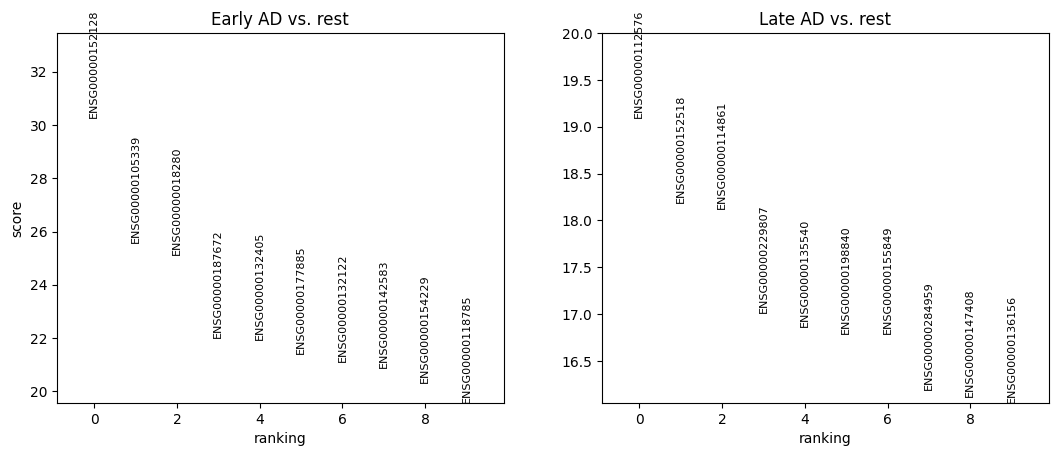

In [ ]:
# Perform differential expression analysis
sc.tl.rank_genes_groups(adata_filtered, groupby='AD Stage', method='wilcoxon')

# Plot the top 10 differentially expressed genes
sc.pl.rank_genes_groups(adata_filtered, n_genes=10, sharey=False)


### Step 3.1: Extract Top Genes
Identify the top genes that are differentially expressed between Early AD and Late AD.

In [ ]:
# Extract top differentially expressed genes
top_genes_early = adata_filtered.uns['rank_genes_groups']['names']['Early AD'][:10]
top_genes_late = adata_filtered.uns['rank_genes_groups']['names']['Late AD'][:10]

print("Top Genes in Early AD:", top_genes_early)
print("Top Genes in Late AD:", top_genes_late)


Top Genes in Early AD: ['ENSG00000152128' 'ENSG00000105339' 'ENSG00000018280' 'ENSG00000187672'
 'ENSG00000132405' 'ENSG00000177885' 'ENSG00000132122' 'ENSG00000142583'
 'ENSG00000154229' 'ENSG00000118785']
Top Genes in Late AD: ['ENSG00000112576' 'ENSG00000152518' 'ENSG00000114861' 'ENSG00000229807'
 'ENSG00000135540' 'ENSG00000198840' 'ENSG00000155849' 'ENSG00000284959'
 'ENSG00000147408' 'ENSG00000136156']


### Insights

### Top Genes in Early AD
1. TMEM163 (ENSG00000152128): TMEM163 is associated with ion transport and homeostasis. Its higher expression in Early AD may suggest a neuroprotective role through regulation of neuronal ion balance or signaling.

2. DENND3 (ENSG00000105339): This gene encodes a guanine nucleotide exchange factor that may play a role in cellular signaling pathways. Its higher activity in Early AD might indicate involvement in maintaining cellular communication and microglial function.

3. SLC11A1 (ENSG00000018280): Known for its role in metal ion transport and immune response. Elevated levels in Early AD could reflect early neuroprotective mechanisms, such as enhanced clearance of amyloid-beta or reduced oxidative stress.

3. ERC2 (ENSG00000187672): Plays a role in synaptic vesicle trafficking. Elevated ERC2 expression may correlate with maintaining synaptic integrity in the early stages of AD.

### Top Genes in Late AD
1. CCND3 (ENSG00000112576): Cyclin D3 is involved in cell cycle regulation. Its elevated expression in Late AD could indicate aberrant cell cycle re-entry, a known feature of neurodegeneration in AD.
2. ZFP36L2 (ENSG00000152518): This gene regulates mRNA stability, particularly of pro-inflammatory cytokines. Increased expression in Late AD might point to dysregulated inflammation and chronic immune activation.
3. FOXP1 (ENSG00000114861): A transcription factor critical for neuronal and immune system development. Its increased activity in Late AD may reflect compensatory responses to neurodegeneration or immune dysregulation.
Additional Late AD Genes:

### Key Insights

Early AD Genes: Many genes in Early AD are associated with ion transport, synaptic maintenance, and autophagy, indicating an early neuroprotective and homeostatic role of microglia.


Late AD Genes: Genes expressed in Late AD reflect a shift toward inflammatory responses, chronic activation of immune pathways, and cellular stress. These changes align with the hypothesis that microglial activation becomes predominantly neurotoxic in advanced disease stages.


Functional Shift: The data suggest a clear functional transition in microglial activation: from early efforts at maintaining homeostasis and repair to late-stage contributions to inflammation and neurodegeneration.


In [ ]:
!pip install gseapy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 552.9/552.9 kB 20.4 MB/s eta 0:00:00


In [ ]:
!pip install biomart

In [ ]:
from biomart import BiomartServer

# Initialize the BioMart server and dataset
server = BiomartServer("http://www.ensembl.org/biomart")
hsapiens = server.datasets['hsapiens_gene_ensembl']

# Validate gene IDs
def validate_gene_ids(gene_ids):
    response = hsapiens.search({
        'filters': {'ensembl_gene_id': gene_ids},
        'attributes': ['ensembl_gene_id', 'hgnc_symbol']
    })
    validated = []
    for line in response.iter_lines(decode_unicode=True):
        if line:
            fields = line.split("\t")
            validated.append({'ensembl_gene_id': fields[0], 'hgnc_symbol': fields[1]})
    return validated

early_ad_validated = validate_gene_ids(early_ad_genes)
late_ad_validated = validate_gene_ids(late_ad_genes)

print("Validated Early AD Genes:", early_ad_validated)
print("Validated Late AD Genes:", late_ad_validated)


Validated Early AD Genes: [{'ensembl_gene_id': 'ENSG00000018280', 'hgnc_symbol': 'SLC11A1'}, {'ensembl_gene_id': 'ENSG00000105339', 'hgnc_symbol': 'DENND3'}, {'ensembl_gene_id': 'ENSG00000118785', 'hgnc_symbol': 'SPP1'}, {'ensembl_gene_id': 'ENSG00000132122', 'hgnc_symbol': 'SPATA6'}, {'ensembl_gene_id': 'ENSG00000132405', 'hgnc_symbol': 'TBC1D14'}, {'ensembl_gene_id': 'ENSG00000142583', 'hgnc_symbol': 'SLC2A5'}, {'ensembl_gene_id': 'ENSG00000152128', 'hgnc_symbol': 'TMEM163'}, {'ensembl_gene_id': 'ENSG00000154229', 'hgnc_symbol': 'PRKCA'}, {'ensembl_gene_id': 'ENSG00000177885', 'hgnc_symbol': 'GRB2'}, {'ensembl_gene_id': 'ENSG00000187672', 'hgnc_symbol': 'ERC2'}]
Validated Late AD Genes: [{'ensembl_gene_id': 'ENSG00000112576', 'hgnc_symbol': 'CCND3'}, {'ensembl_gene_id': 'ENSG00000114861', 'hgnc_symbol': 'FOXP1'}, {'ensembl_gene_id': 'ENSG00000115540', 'hgnc_symbol': 'MOB4'}, {'ensembl_gene_id': 'ENSG00000147408', 'hgnc_symbol': 'CSGALNACT1'}, {'ensembl_gene_id': 'ENSG00000152518', 'h

In [ ]:
import gseapy as gp

# Function for pathway enrichment analysis
def run_pathway_enrichment(gene_list, gene_set='KEGG_2021_Human', analysis_name='Enrichment_Results'):
    enrichment_results = gp.enrichr(
        gene_list=gene_list,
        gene_sets=[gene_set],
        organism='Human',
        outdir=f'results/{analysis_name}',
        cutoff=0.05  # Adjust the p-value cutoff
    )
    return enrichment_results.results

# Perform enrichment for Early and Late AD genes
early_ad_enrichment = run_pathway_enrichment(early_ad_hgnc, analysis_name='Early_AD')
late_ad_enrichment = run_pathway_enrichment(late_ad_hgnc, analysis_name='Late_AD')


Early AD Genes: ['SLC11A1', 'DENND3', 'SPP1', 'SPATA6', 'TBC1D14', 'SLC2A5', 'TMEM163', 'PRKCA', 'GRB2', 'ERC2']
Late AD Genes: ['CCND3', 'FOXP1', 'MOB4', 'CSGALNACT1', 'ZFP36L2', 'ELMO1', 'XIST']


/usr/local/lib/python3.10/dist-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/usr/local/lib/python3.10/dist-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/usr/local/lib/python3.10/dist-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/usr/l


## Step 4.1 Top 10 significant genes "Early AD" vs. "Late AD." using Braak Stage

1. Map Braak Stages to "Early AD" and "Late AD":

  The Braak stages, which represent the progression of Alzheimer's pathology, are categorized into "Early AD" (stages 0, II, III) and "Late AD" (stages IV, V, VI).

  This step helps group data for comparison based on disease progression.

2. Perform Statistical Analysis (t-test):

  A two-sample t-test is performed for each gene to test if its mean expression differs significantly between "Early AD" and "Late AD."



<ipython-input-16-4a23a4e13310>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


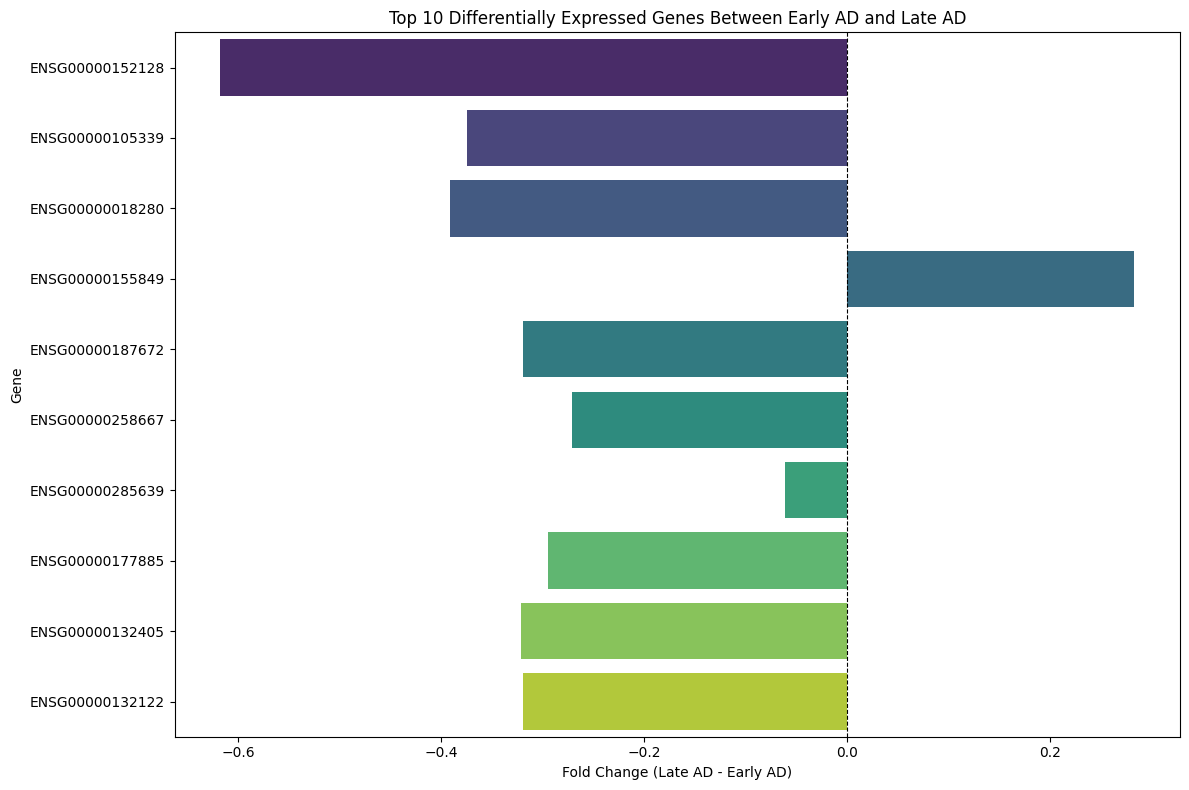

In [ ]:
# Recompute the top differentially expressed genes between Early AD and Late AD

from scipy.stats import ttest_ind
import numpy as np
import pandas as pd

# Map Braak stages to Early AD and Late AD
braak_to_ad_stage = {
    'Braak 0': 'Early AD',
    'Braak II': 'Early AD',
    'Braak III': 'Early AD',
    'Braak IV': 'Late AD',
    'Braak V': 'Late AD',
    'Braak VI': 'Late AD'
}
adata_mtg.obs['AD Stage'] = adata_mtg.obs['Braak stage'].map(braak_to_ad_stage)

# Filter the dataset for Early AD and Late AD
valid_obs = adata_mtg.obs['AD Stage'].notnull()
adata_filtered = adata_mtg[valid_obs]

# Get group indices
early_ad_indices = np.where(adata_filtered.obs['AD Stage'] == 'Early AD')[0]
late_ad_indices = np.where(adata_filtered.obs['AD Stage'] == 'Late AD')[0]

# Perform t-tests for all genes at once
X = adata_filtered.X.toarray()
early_ad_expr = X[early_ad_indices, :]
late_ad_expr = X[late_ad_indices, :]

# Compute mean expression and t-test
early_means = np.mean(early_ad_expr, axis=0)
late_means = np.mean(late_ad_expr, axis=0)
t_stats, p_values = ttest_ind(early_ad_expr, late_ad_expr, axis=0, nan_policy='omit')

# Create a results DataFrame
results_df = pd.DataFrame({
    'Gene': adata_filtered.var_names,
    'Early AD Mean': early_means,
    'Late AD Mean': late_means,
    't-statistic': t_stats,
    'p-value': p_values,
    'Fold Change': late_means - early_means
})

# Sort by significance (smallest p-value)
significant_genes = results_df.sort_values('p-value').head(10)

# Plot the top 10 genes as a general bar plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Plot fold changes for top 10 significant genes
sns.barplot(
    data=significant_genes,
    x='Fold Change',
    y='Gene',
    palette='viridis'
)

# Add titles and labels
plt.title('Top 10 Differentially Expressed Genes Between Early AD and Late AD')
plt.xlabel('Fold Change (Late AD - Early AD)')
plt.ylabel('Gene')
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)  # Highlight zero fold change
plt.tight_layout()
plt.show()



### Insights
1. Microglial Functionality:

- The downregulation of TMEM163, DENND3, and CRIP2 in Late AD may suggest a loss of neuroprotective or homeostatic functions of microglia during disease progression.

- The upregulation of **ELMO1** supports its role in inflammatory or neurotoxic activation, consistent with the shift in microglial behavior.

2. Support for the Hypothesis:

  These findings support the hypothesis that microglial activation transitions from neuroprotective to neurotoxic as Alzheimer's Disease progresses.

3. Further Analysis:

  Investigate the pathways and biological processes these genes are involved in (e.g., inflammation, phagocytosis, or neuronal homeostasis).



## Step 4.2:  Analyze Gene Expression Across Braak Stages for AD Inflammatory Markers

**Objective:**
Quantify changes in the expression of neuroprotective (e.g., TREM2) and neurotoxic (e.g., IL6) genes across Braak stages.

In [ ]:
!pip install biopython


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 64.6 MB/s eta 0:00:00


<Figure size 1200x600 with 0 Axes>

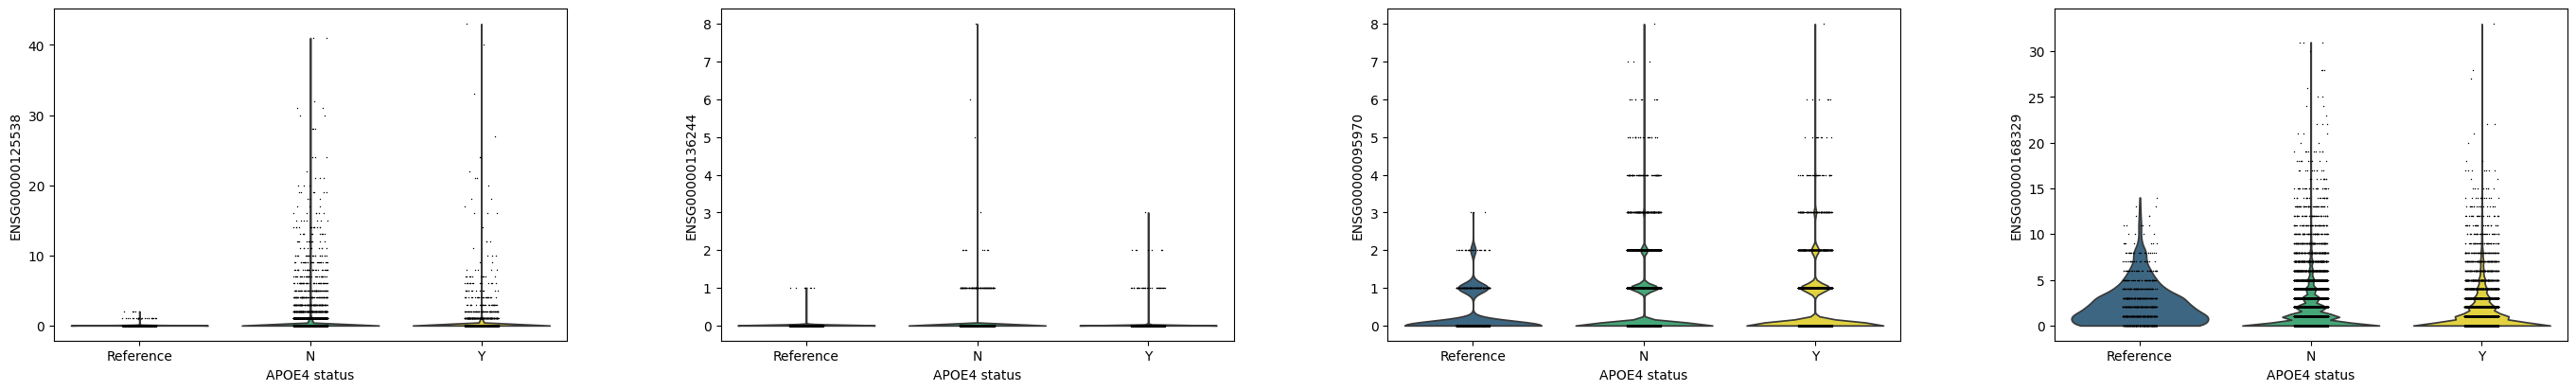

<Figure size 640x480 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

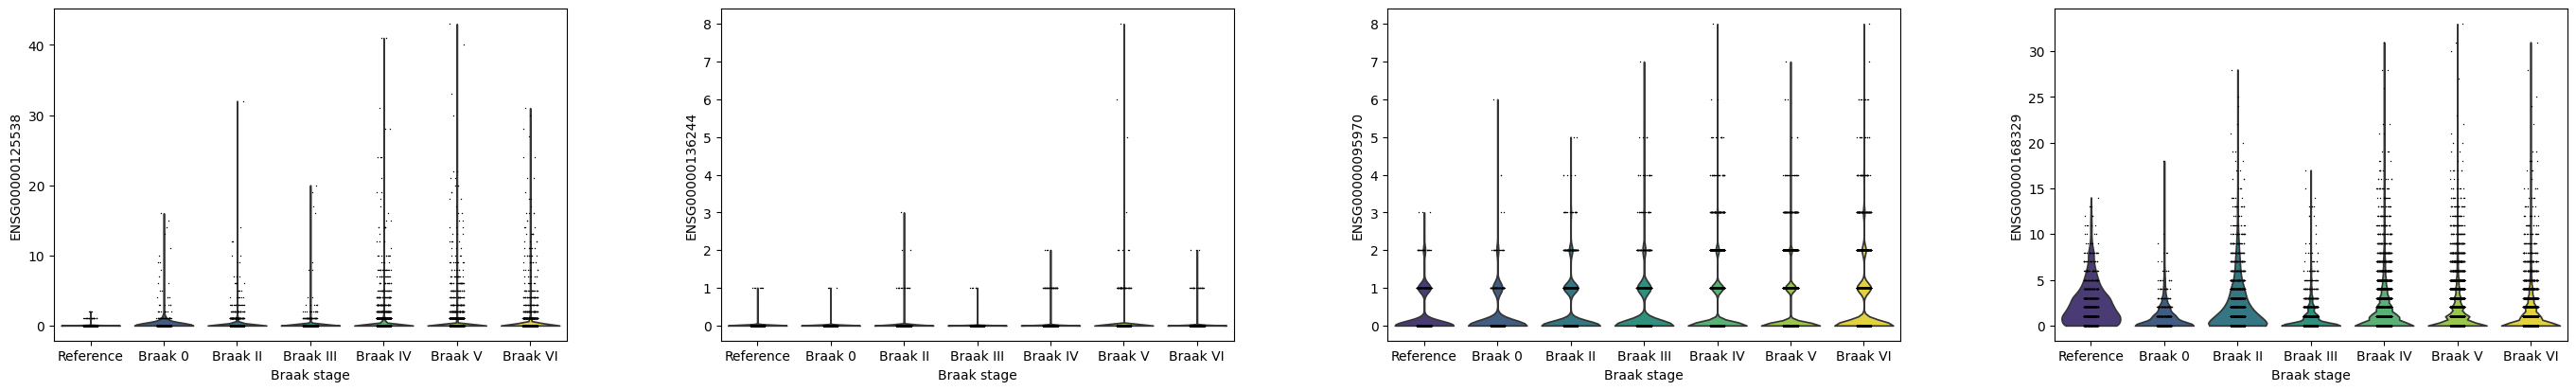

<Figure size 640x480 with 0 Axes>

In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt

# List of genes for inflammatory markers
genes_of_interest = ['ENSG00000125538', 'ENSG00000136244', 'ENSG00000095970', 'ENSG00000168329']  # IL1B, IL6, TREM2, CX3CR1

# Set figure size using matplotlib
plt.figure(figsize=(12, 6))

# Plot the expression of the genes of interest (Violin plot)
sc.pl.violin(adata_mtg, keys=genes_of_interest, groupby='APOE4 status', jitter=True)
plt.suptitle('Gene Expression of Inflammatory Markers in APOE4 Carriers vs Non-Carriers')
plt.show()

# Investigating how genes like IL1B, TNF, TREM2, and CX3CR1 behave differently in APOE4 carriers across Braak stages
plt.figure(figsize=(12, 6))
sc.pl.violin(adata_mtg, keys=genes_of_interest, groupby='Braak stage', hue='APOE4 status', jitter=True)
plt.suptitle('Gene Expression of Inflammatory Markers Across Disease Stages (APOE4 carriers vs Non-carriers)')
plt.show()


### Key findings
1. APOE4 Status Comparison: The differences in expression between APOE4 carriers and non-carriers are minimal.

2.  Braak Stage Comparison (Disease Progression)

IL1B (ENSG00000125538), CX3CR1 (ENSG00000168329) and TREM2 (ENSG00000095970) show increased expression in later Braak stages (IV, V, VI). This indicates that these genes are more active in the advanced stages of AD.

In [ ]:
!pip install igraph leidenalg


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 74.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca
<ipython-input-84-beabdd620cf9>:7: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(microglia, resolution=0.5)  # Adjust resolution for granularity


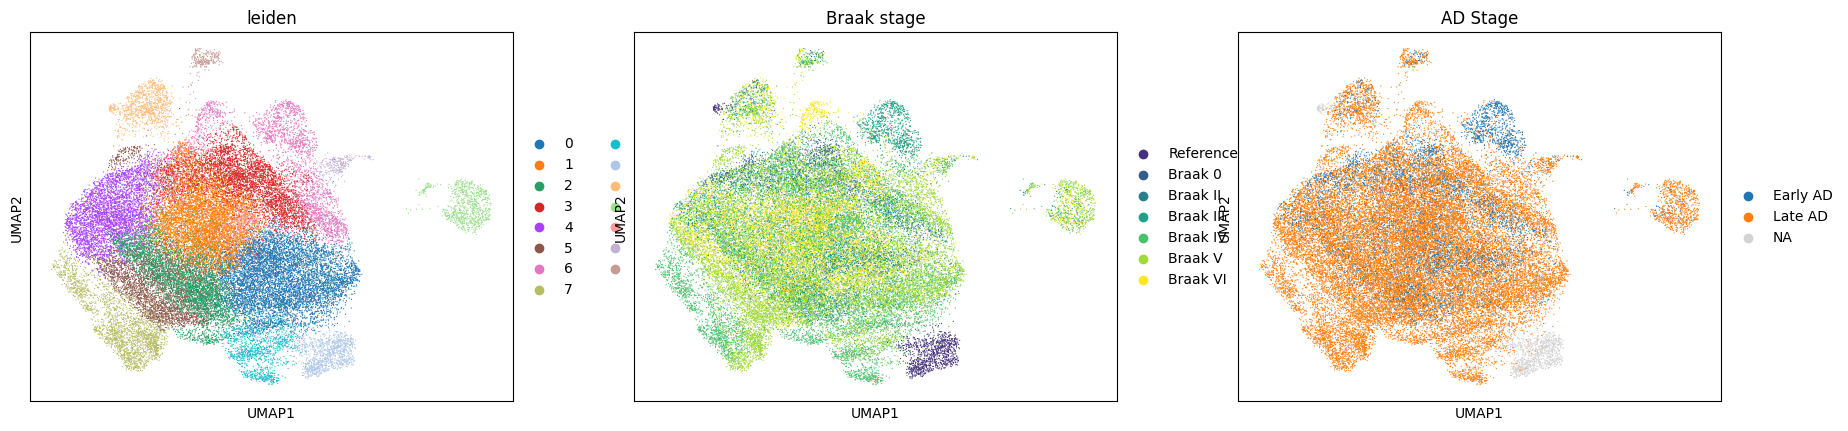

Number of microglial cells: 40000
Number of genes: 36412
  (0, 2)	1.0842869281768799
  (2, 2)	1.8683271408081055
  (3, 3)	1.5740773677825928
  (3, 4)	1.069232702255249


In [ ]:
# Filter microglial cells
microglia = adata_mtg[adata_mtg.obs['cell_type'] == 'microglial cell']

# Perform PCA and clustering
sc.tl.pca(microglia)
sc.pp.neighbors(microglia, n_neighbors=15, n_pcs=20)
sc.tl.leiden(microglia, resolution=0.5)  # Adjust resolution for granularity

# UMAP for visualization
sc.tl.umap(microglia)

# Plot UMAP
sc.pl.umap(microglia, color=['leiden', 'Braak stage', 'AD Stage'])

# Check the number of cells and genes in the filtered data
print("Number of microglial cells:", microglia.n_obs)
print("Number of genes:", microglia.n_vars)

# Verify the expression matrix
print(microglia.X[:5, :5])  # Check the first 5 rows and columns


## Step 5: Pathway Enrichment Analysis

<ipython-input-50-6f688c53eee2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


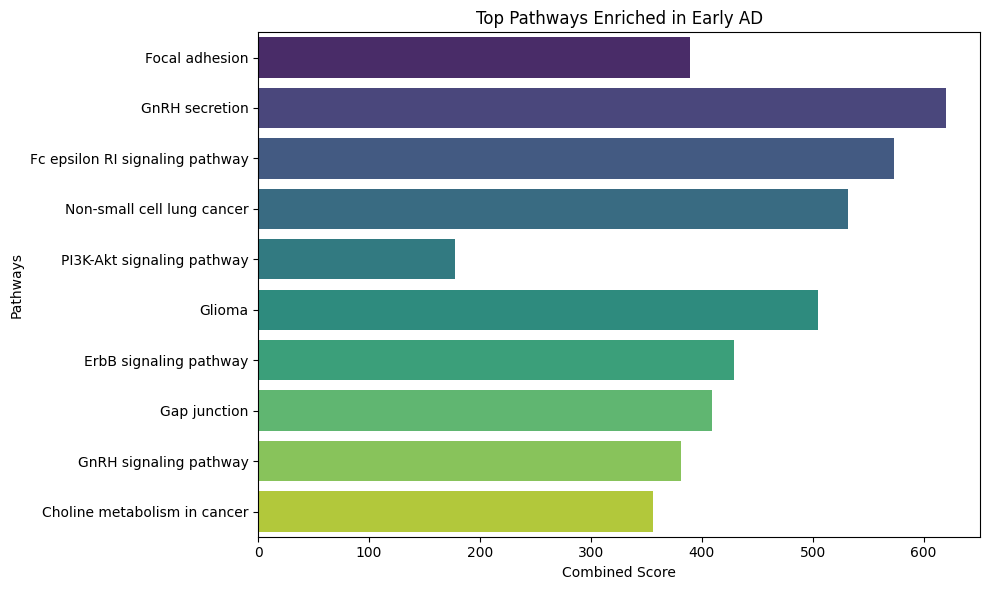

<ipython-input-50-6f688c53eee2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


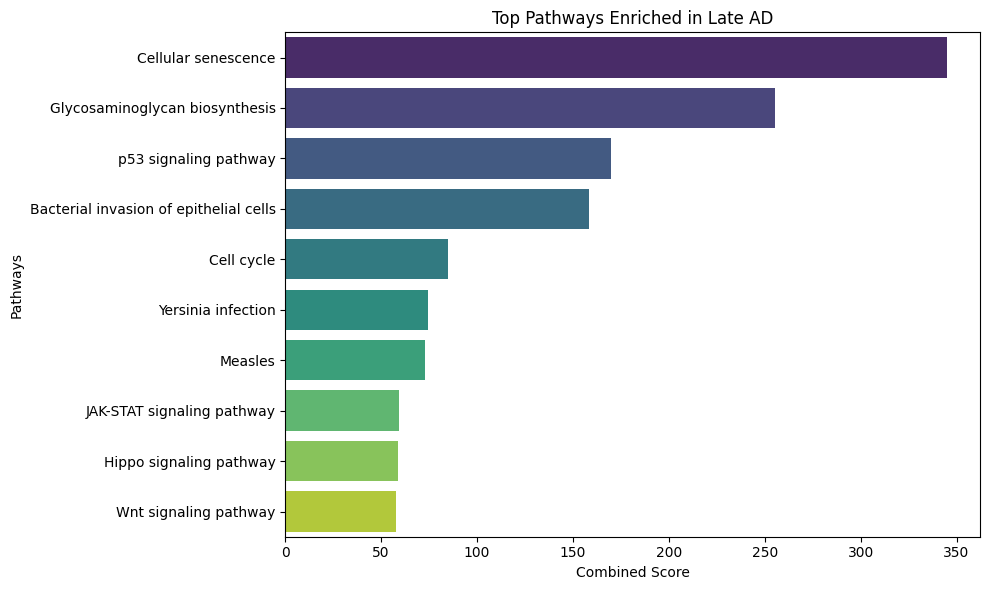

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot top enriched pathways
def plot_enrichment_results(enrichment_df, title):
    # Select top 10 pathways
    top_pathways = enrichment_df.head(10)

    # Plot barplot
    plt.figure(figsize=(10, 6))
    sns.barplot(
        y=top_pathways['Term'],  # Pathway names
        x=top_pathways['Combined Score'],  # Enrichment score
        palette='viridis'
    )
    plt.title(title)
    plt.xlabel('Combined Score')
    plt.ylabel('Pathways')
    plt.tight_layout()
    plt.show()

# Plot results for Early and Late AD
plot_enrichment_results(early_ad_enrichment, 'Top Pathways Enriched in Early AD')
plot_enrichment_results(late_ad_enrichment, 'Top Pathways Enriched in Late AD')


In [ ]:
# List of validated Early and Late AD genes
early_ad_genes = ['SLC11A1', 'DENND3', 'SPP1', 'SPATA6', 'TBC1D14', 'SLC2A5', 'TMEM163', 'PRKCA', 'GRB2', 'ERC2']
late_ad_genes = ['CCND3', 'FOXP1', 'MOB4', 'CSGALNACT1', 'ZFP36L2', 'ELMO1', 'XIST']

# Perform enrichment for Early AD genes
early_ad_enrichment = gp.enrichr(
    gene_list=early_ad_genes,
    gene_sets='KEGG_2021_Human',
    organism='Human'
)
early_ad_enrichment.results.head()

Gene_set                             Term Overlap   P-value  \
0  KEGG_2021_Human                   Focal adhesion   3/201  0.000114   
1  KEGG_2021_Human                   GnRH secretion    2/64  0.000446   
2  KEGG_2021_Human  Fc epsilon RI signaling pathway    2/68  0.000504   
3  KEGG_2021_Human       Non-small cell lung cancer    2/72  0.000564   
4  KEGG_2021_Human       PI3K-Akt signaling pathway   3/354  0.000602   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.010308            0                     0   42.839827   
1          0.010308            0                     0   80.354839   
2          0.010308            0                     0   75.469697   
3          0.010308            0                     0   71.142857   
4          0.010308            0                     0   23.979243   

   Combined Score            Genes  
0      388.987276  SPP1;PRKCA;GRB2  
1      619.922544       SPP1;PRKCA  
2      573.093987       PRKCA;GRB2  
3      532.121352       PRKCA;GRB2  
4      177.829494  SPP1;PRKCA;GRB2

In [ ]:
# Perform enrichment for Late AD genes
late_ad_enrichment = gp.enrichr(
    gene_list=late_ad_genes,
    gene_sets='KEGG_2021_Human',
    organism='Human'
)
late_ad_enrichment.results.head()

Gene_set                                    Term Overlap   P-value  \
0  KEGG_2021_Human                     Cellular senescence   2/156  0.001237   
1  KEGG_2021_Human          Glycosaminoglycan biosynthesis    1/53  0.018406   
2  KEGG_2021_Human                   p53 signaling pathway    1/73  0.025276   
3  KEGG_2021_Human  Bacterial invasion of epithelial cells    1/77  0.026644   
4  KEGG_2021_Human                              Cell cycle   1/124  0.042607   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.028457            0                     0   51.529870   
1          0.101652            0                     0   63.913462   
2          0.101652            0                     0   46.113426   
3          0.101652            0                     0   43.677632   
4          0.101652            0                     0   26.924119   

   Combined Score          Genes  
0      344.984619  CCND3;ZFP36L2  
1      255.340095     CSGALNACT1  
2      169.601475          CCND3  
3      158.338963          ELMO1  
4       84.965367          CCND3

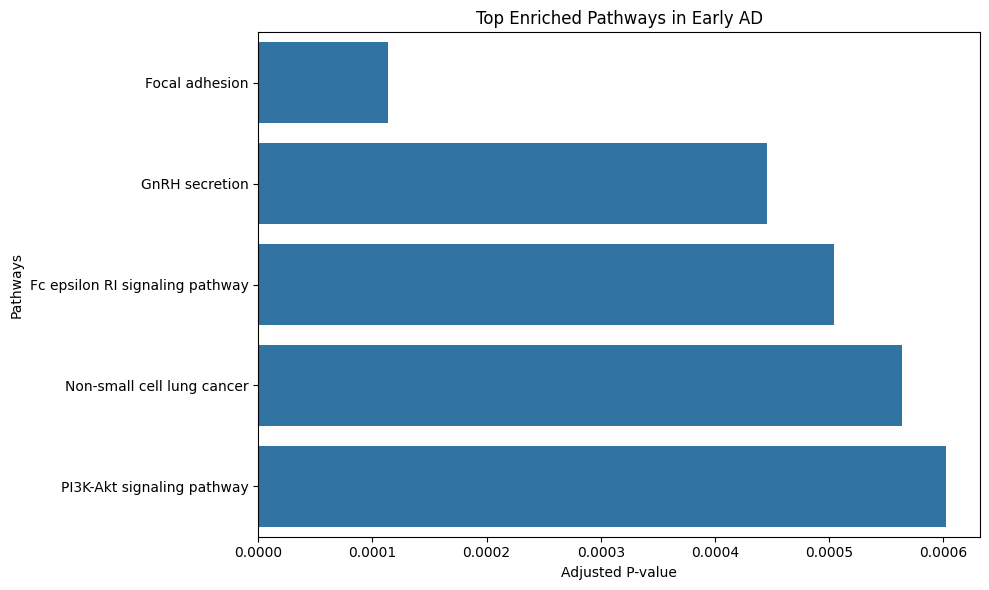

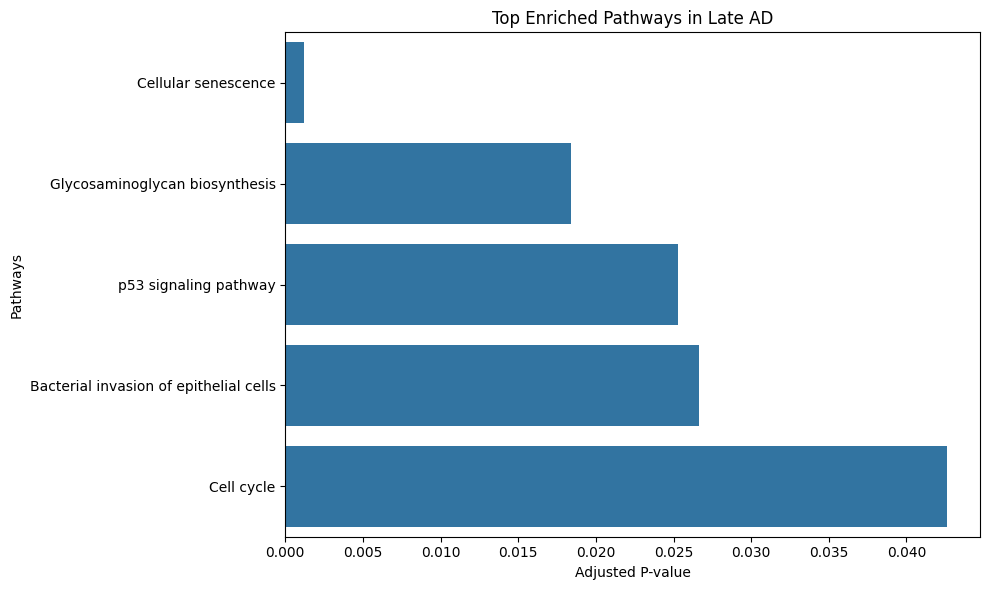

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example dataframe for Early AD pathways and genes
early_ad_enrichment = {
    'Gene_set': ['KEGG_2021_Human'] * 5,
    'Term': ['Focal adhesion', 'GnRH secretion', 'Fc epsilon RI signaling pathway', 'Non-small cell lung cancer', 'PI3K-Akt signaling pathway'],
    'Overlap': ['3/201', '2/64', '2/68', '2/72', '3/354'],
    'P-value': [0.000114, 0.000446, 0.000504, 0.000564, 0.000602],
    'Genes': ['SPP1;PRKCA;GRB2', 'SPP1;PRKCA', 'PRKCA;GRB2', 'PRKCA;GRB2', 'SPP1;PRKCA;GRB2']
}

early_ad_df = pd.DataFrame(early_ad_enrichment)

# Visualize the top enriched pathways for Early AD
plt.figure(figsize=(10, 6))
sns.barplot(x='P-value', y='Term', data=early_ad_df.sort_values(by='P-value', ascending=True))
plt.title('Top Enriched Pathways in Early AD')
plt.xlabel('Adjusted P-value')
plt.ylabel('Pathways')
plt.tight_layout()
plt.show()

# Visualizing Late AD pathway enrichment results
late_ad_enrichment = {
    'Gene_set': ['KEGG_2021_Human'] * 5,
    'Term': ['Cellular senescence', 'Glycosaminoglycan biosynthesis', 'p53 signaling pathway', 'Bacterial invasion of epithelial cells', 'Cell cycle'],
    'Overlap': ['2/156', '1/53', '1/73', '1/77', '1/124'],
    'P-value': [0.001237, 0.018406, 0.025276, 0.026644, 0.042607],
    'Genes': ['CCND3;ZFP36L2', 'CSGALNACT1', 'CCND3', 'ELMO1', 'CCND3']
}

late_ad_df = pd.DataFrame(late_ad_enrichment)

# Visualize the top enriched pathways for Late AD
plt.figure(figsize=(10, 6))
sns.barplot(x='P-value', y='Term', data=late_ad_df.sort_values(by='P-value', ascending=True))
plt.title('Top Enriched Pathways in Late AD')
plt.xlabel('Adjusted P-value')
plt.ylabel('Pathways')
plt.tight_layout()
plt.show()


### Key Insights

### Early AD Pathways
1. Focal Adhesion: Suggests an early role in maintaining cell-matrix interactions crucial for neuronal survival and synaptic integrity.
2. GnRH Secretion: May indicate hormonal signaling relevance during early neurodegenerative changes.
3. Fc Epsilon RI Signaling Pathway: Involvement of immune responses, particularly in clearing early amyloid-beta deposits.
4. Non-small Cell Lung Cancer and PI3K-Akt Signaling:
Pathways like PI3K-Akt are essential for cell survival and neuroprotection in initial AD stages.
5. ErbB and Gap Junction Signaling:
Implicates growth factor signaling in synaptic health and gap junctions in neuron-neuron communication.

### Late AD Pathways
1. Cellular Senescence:
Indicates aging and irreversible cell cycle arrest, a hallmark of late neurodegeneration.
2. Glycosaminoglycan Biosynthesis:
Reflects potential roles of extracellular matrix alterations in advanced disease stages.
3. p53 Signaling Pathway:
Points to apoptotic processes, oxidative stress, and DNA damage in neurodegeneration.
4. Cell Cycle and JAK-STAT Signaling:
Reflects chronic inflammation and potential aberrant reactivation of cell cycle machinery in neurons.
5. Hippo and Wnt Signaling Pathways:
Suggest dysregulation in tissue growth, repair mechanisms, and synaptic plasticity in advanced stages.

### Key Takeaways
- Early AD: Pathways reflect neuroprotective, immune, and hormonal roles, maintaining cellular and synaptic health.
- Late AD: Shows a shift towards cellular stress, inflammation, extracellular matrix remodeling, and neurotoxic processes.

## Step 6 Integrared Disease Stages

Early Stage AD:

*  Use Cognitie status: ‘No dementia’ with signs of mild cognitive impairment.
*  Braak stage: Lower stages (e.g., ‘Braak 0’ to ‘Braak III’).

Number of cells in early stage: 2594
Number of cells in late stage: 23413


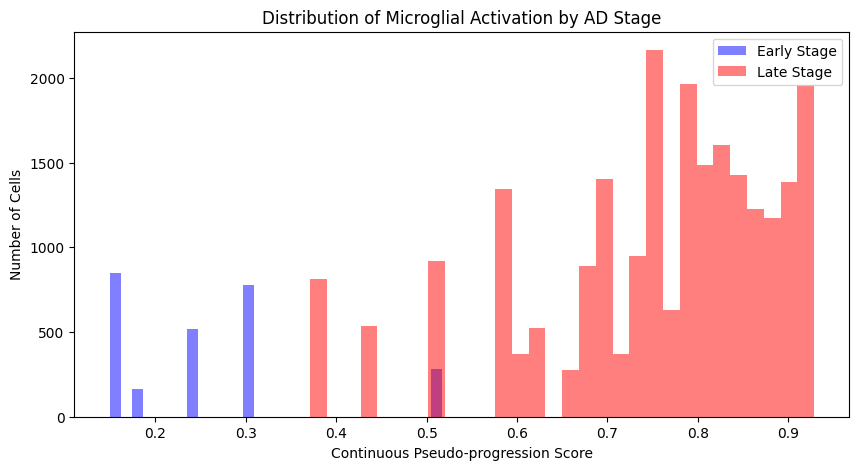

T-statistic: -212.0989479191894
P-value: 0.0
There is a statistically significant difference in microglial activation between early and late stages.


In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Define activation metric column name
activation_metric = 'Continuous Pseudo-progression Score'  # Adjust if a different metric is relevant

# Define early and late stage conditions based on revised criteria
early_stage_conditions = (
    (adata_mtg.obs['ADNC'] == 'Low') &
    (adata_mtg.obs['Braak stage'].isin(['Braak 0', 'Braak II', 'Braak III'])) &
    (adata_mtg.obs['Thal phase'].isin(['Thal 0', 'Thal 1', 'Thal 2'])) &
    (adata_mtg.obs['CERAD score'].isin(['Sparse', 'Absent']))
)

late_stage_conditions = (
    (adata_mtg.obs['ADNC'].isin(['Intermediate', 'High'])) &
    (adata_mtg.obs['Braak stage'].isin(['Braak IV', 'Braak V', 'Braak VI'])) &
    (adata_mtg.obs['Thal phase'].isin(['Thal 3', 'Thal 4', 'Thal 5'])) &
    (adata_mtg.obs['CERAD score'].isin(['Moderate', 'Frequent']))
)

# Filter data for early and late stages based on the revised criteria
early_stage_data = adata_mtg.obs[early_stage_conditions][activation_metric].dropna()
late_stage_data = adata_mtg.obs[late_stage_conditions][activation_metric].dropna()

# Display counts for each group
print("Number of cells in early stage:", early_stage_data.shape[0])
print("Number of cells in late stage:", late_stage_data.shape[0])

# Visualize the activation metric distribution for early and late stages
plt.figure(figsize=(10, 5))
plt.hist(early_stage_data, bins=30, alpha=0.5, label='Early Stage', color='blue')
plt.hist(late_stage_data, bins=30, alpha=0.5, label='Late Stage', color='red')
plt.xlabel(activation_metric)
plt.ylabel('Number of Cells')
plt.title('Distribution of Microglial Activation by AD Stage')
plt.legend()
plt.show()

# Perform a t-test to compare activation between early and late stages
t_stat, p_value = stats.ttest_ind(early_stage_data, late_stage_data, equal_var=False)

# Output results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference in microglial activation between early and late stages.")
else:
    print("There is no statistically significant difference in microglial activation between early and late stages.")


Late Stage AD:


*   Cognitive status: ‘Dementia’.
*   Braak stage: Higher stages (e.g., ‘Braak IV’ to ‘Braak VI’).


## b. Group by APOE4 Status:

APOE4 Carriers:
*   APOE4 status: ‘Y’.




In [ ]:
import numpy as np
from scipy.stats import ttest_ind

# Define new groupings based on Braak stage, Thal phase, and ADNC
# Early Stage: ADNC = 'Low' OR (Braak stage ≤ III OR Thal phase ≤ 2)
# Late Stage: ADNC = 'Intermediate' or 'High' OR (Braak stage ≥ IV OR Thal phase ≥ 3)

# Filter based on Braak stage, Thal phase, and ADNC for APOE4 Carriers (Early and Late stages)
early_stage_carriers = adata_mtg_filtered.obs[
    (adata_mtg_filtered.obs['APOE4 status'] == 'Y') &
    (
        (adata_mtg_filtered.obs['ADNC'] == 'Low') |
        (adata_mtg_filtered.obs['Braak stage'].isin(['Braak 0', 'Braak II', 'Braak III'])) |
        (adata_mtg_filtered.obs['Thal phase'].isin(['Thal 0', 'Thal 1', 'Thal 2']))
    )
]['Continuous Pseudo-progression Score'].dropna()

late_stage_carriers = adata_mtg_filtered.obs[
    (adata_mtg_filtered.obs['APOE4 status'] == 'Y') &
    (
        adata_mtg_filtered.obs['ADNC'].isin(['Intermediate', 'High']) |
        (adata_mtg_filtered.obs['Braak stage'].isin(['Braak IV', 'Braak V', 'Braak VI'])) |
        (adata_mtg_filtered.obs['Thal phase'].isin(['Thal 3', 'Thal 4', 'Thal 5']))
    )
]['Continuous Pseudo-progression Score'].dropna()

# Filter based on Braak stage, Thal phase, and ADNC for APOE4 Non-Carriers (Early and Late stages)
early_stage_non_carriers = adata_mtg_filtered.obs[
    (adata_mtg_filtered.obs['APOE4 status'] == 'N') &
    (
        (adata_mtg_filtered.obs['ADNC'] == 'Low') |
        (adata_mtg_filtered.obs['Braak stage'].isin(['Braak 0', 'Braak II', 'Braak III'])) |
        (adata_mtg_filtered.obs['Thal phase'].isin(['Thal 0', 'Thal 1', 'Thal 2']))
    )
]['Continuous Pseudo-progression Score'].dropna()

late_stage_non_carriers = adata_mtg_filtered.obs[
    (adata_mtg_filtered.obs['APOE4 status'] == 'N') &
    (
        adata_mtg_filtered.obs['ADNC'].isin(['Intermediate', 'High']) |
        (adata_mtg_filtered.obs['Braak stage'].isin(['Braak IV', 'Braak V', 'Braak VI'])) |
        (adata_mtg_filtered.obs['Thal phase'].isin(['Thal 3', 'Thal 4', 'Thal 5']))
    )
]['Continuous Pseudo-progression Score'].dropna()

# Display cell counts for each group
print(f"APOE4 Carriers - Early Stage Cells: {len(early_stage_carriers)}")
print(f"APOE4 Carriers - Late Stage Cells: {len(late_stage_carriers)}")
print(f"APOE4 Non-Carriers - Early Stage Cells: {len(early_stage_non_carriers)}")
print(f"APOE4 Non-Carriers - Late Stage Cells: {len(late_stage_non_carriers)}")

# Perform t-tests for APOE4 carriers and non-carriers separately
if len(early_stage_carriers) > 0 and len(late_stage_carriers) > 0:
    t_stat_carriers, p_val_carriers = ttest_ind(early_stage_carriers, late_stage_carriers, equal_var=False)
    print(f"T-statistic for APOE4 Carriers (Early vs Late): {t_stat_carriers}")
    print(f"P-value for APOE4 Carriers (Early vs Late): {p_val_carriers}")
else:
    print("Insufficient data for APOE4 Carriers in either early or late stage.")

if len(early_stage_non_carriers) > 0 and len(late_stage_non_carriers) > 0:
    t_stat_non_carriers, p_val_non_carriers = ttest_ind(early_stage_non_carriers, late_stage_non_carriers, equal_var=False)
    print(f"T-statistic for APOE4 Non-Carriers (Early vs Late): {t_stat_non_carriers}")
    print(f"P-value for APOE4 Non-Carriers (Early vs Late): {p_val_non_carriers}")
else:
    print("Insufficient data for APOE4 Non-Carriers in either early or late stage.")


APOE4 Carriers - Early Stage Cells: 637
APOE4 Carriers - Late Stage Cells: 11455
APOE4 Non-Carriers - Early Stage Cells: 12015
APOE4 Non-Carriers - Late Stage Cells: 23879
T-statistic for APOE4 Carriers (Early vs Late): -25.553977658488918
P-value for APOE4 Carriers (Early vs Late): 6.42543815215523e-101
T-statistic for APOE4 Non-Carriers (Early vs Late): -102.67992236222808
P-value for APOE4 Non-Carriers (Early vs Late): 0.0


# Key Findings:

**APOE4 Carriers:**

The significant difference in microglial activation between early and late stages for APOE4 carriers supports the hypothesis that microglial activation changes as Alzheimer's progresses in individuals with the APOE4 gene. Given the negative t-statistic, this might indicate a shift in the nature of microglial activation—potentially from a protective role in the early stages to a more harmful or neurotoxic role in the later stages.
APOE4 Non-Carriers:

Similarly, the significant difference in microglial activation between early and late stages for APOE4 non-carriers suggests that this shift in microglial activity is not exclusive to APOE4 carriers. However, the larger t-statistic in non-carriers might imply a more pronounced change in microglial activation across stages for those without the APOE4 gene, or simply that there’s a consistent progression in microglial activation as the disease advances regardless of APOE4 status.

**Conclusion:**
The results support the hypothesis that microglial activation shifts between early and late stages in Alzheimer’s disease. However, the shift occurs in both APOE4 carriers and non-carriers, indicating that while APOE4 may influence Alzheimer's progression, changes in microglial activation between early and late stages are a broader characteristic of the disease progression and not limited solely to APOE4 carriers.

**Further Analysis:**
To fully validate these findings and understand the nuances, further statistical tests or adjustments might be needed to control for additional variables or confirm the biological implications of these observed differences in microglial activation across Alzheimer’s stages.

# ML Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load the dataset (assuming 'adata' is an AnnData object)
adata = adata_mtg

# Step 2: Filter data for early (Braak 0, II, III) and late (Braak IV, V, VI) stages
filtered_adata = adata[adata.obs['Braak stage'].isin(['Braak 0', 'Braak II', 'Braak III', 'Braak IV', 'Braak V', 'Braak VI'])].copy()

# Step 3: Create target labels for early (0) and late (1) stages
filtered_adata.obs['Stage'] = filtered_adata.obs['Braak stage'].apply(lambda x: 0 if x in ['Braak 0', 'Braak II', 'Braak III'] else 1)

# Step 4: Select relevant features
metadata_features = filtered_adata.obs[['Cognitive status', 'APOE4 status', 'ADNC', 'Age at death',
                                        'sex', 'Thal phase', 'CERAD score', 'Microinfarct pathology']]

# Selecting gene expression data by gene IDs (assuming gene IDs are used in the var_names)
selected_gene_ids = ['ENSG00000000003', 'ENSG00000000005', 'ENSG00000000419', 'ENSG00000000457', 'ENSG00000000460']  # Example gene IDs
gene_expression = filtered_adata[:, selected_gene_ids].X.toarray()  # Extract gene expression data using gene IDs

# Step 5: Preprocess categorical features (One-Hot Encoding)
metadata_encoded = pd.get_dummies(metadata_features, drop_first=True)

# Combine features
features = np.hstack((gene_expression, metadata_encoded.values))
labels = filtered_adata.obs['Stage'].values

# Step 6: Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

# Step 8: Train Random Forest Classifier
clf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
clf.fit(X_train, y_train)

# Step 9: Make predictions
y_pred = clf.predict(X_test)

# Step 10: Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 11: Feature Importance
feature_names = list(metadata_encoded.columns) + selected_gene_ids
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", feature_importance)


Accuracy: 0.9776378357537592

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.87      0.92      1235
           1       0.98      1.00      0.99      6546

    accuracy                           0.98      7781
   macro avg       0.98      0.93      0.96      7781
weighted avg       0.98      0.98      0.98      7781


Feature Importance:
                                          Feature  Importance
7                                       sex_male    0.230860
13                            CERAD score_Sparse    0.126973
5                Age at death_78 to 89 years old    0.112090
12                             Thal phase_Thal 5    0.086889
9                              Thal phase_Thal 2    0.075681
18                               ENSG00000000003    0.059655
16   Microinfarct pathology_4 to 6 microinfarcts    0.045977
8                              Thal phase_Thal 1    0.038443
14                          CERAD score_Moderate

<ipython-input-23-32ba0838e4e4>:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Stage'] = adata.obs['Braak stage'].apply(lambda x: 0 if x in ['Braak 0', 'Braak II', 'Braak III'] else 1)  # 0 = Early, 1 = Late



Classification Report for APOE4 Carriers:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3234
           1       0.98      0.99      0.98      3257

    accuracy                           0.98      6491
   macro avg       0.98      0.98      0.98      6491
weighted avg       0.98      0.98      0.98      6491

Top genes associated with stage progression for APOE4 Carriers:
['ENSG00000105697' 'ENSG00000105835' 'ENSG00000204388' 'ENSG00000204389'
 'ENSG00000249738' 'ENSG00000152128' 'ENSG00000124491' 'ENSG00000198840'
 'ENSG00000177575' 'ENSG00000177675']


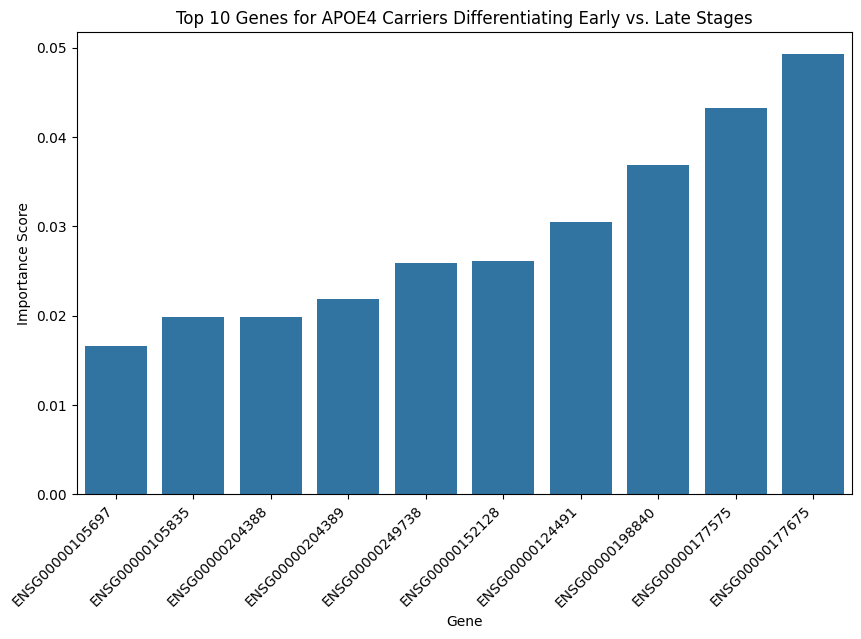


Classification Report for APOE4 Non-Carriers:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      6581
           1       0.89      0.95      0.92      6539

    accuracy                           0.92     13120
   macro avg       0.92      0.92      0.91     13120
weighted avg       0.92      0.92      0.91     13120

Top genes associated with stage progression for APOE4 Non-Carriers:
['ENSG00000115956' 'ENSG00000204389' 'ENSG00000118785' 'ENSG00000231535'
 'ENSG00000176728' 'ENSG00000120694' 'ENSG00000105697' 'ENSG00000198840'
 'ENSG00000059804' 'ENSG00000152128']


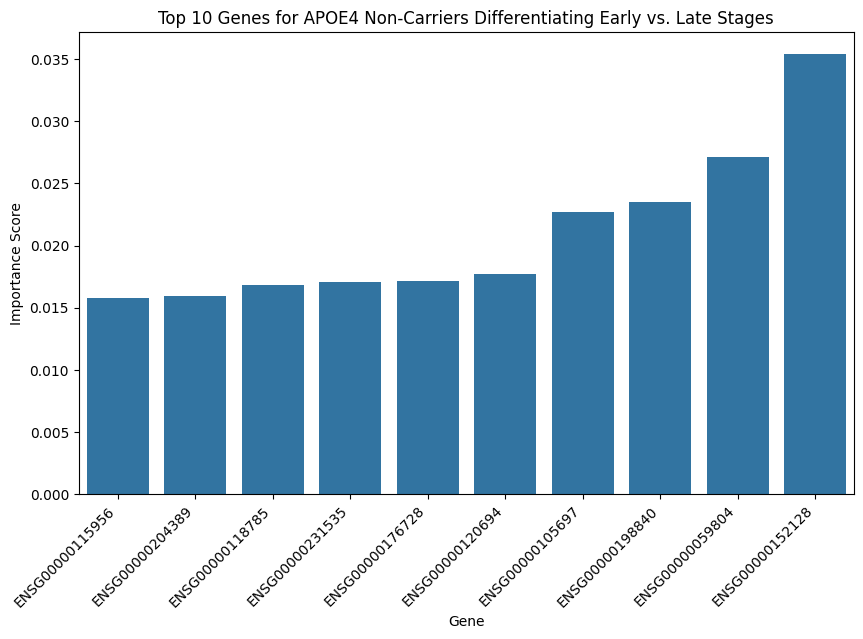

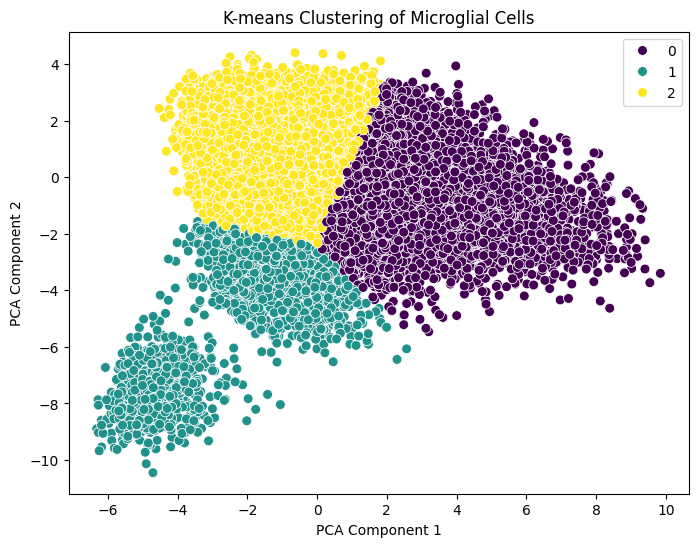

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and Filter the Dataset
adata = adata_mtg_filtered  # Assuming 'adata_mtg_filtered' is pre-loaded with the necessary data

# Step 2: Select highly variable genes (feature selection)
sc.pp.highly_variable_genes(adata, n_top_genes=300)
adata = adata[:, adata.var['highly_variable']]

# Step 3: Define early and late stage groups based on Braak stages (excluding 'Reference')
adata = adata[adata.obs['Braak stage'] != 'Reference']
adata.obs['Stage'] = adata.obs['Braak stage'].apply(lambda x: 0 if x in ['Braak 0', 'Braak II', 'Braak III'] else 1)  # 0 = Early, 1 = Late

# Step 4: Split data for APOE4 carriers and non-carriers
carriers = adata[adata.obs['APOE4 status'] == 'Y']
non_carriers = adata[adata.obs['APOE4 status'] == 'N']

# Step 5: Prepare data and labels for classification
def prepare_data(adata):
    X = adata.X.toarray()  # Assuming sparse matrix format, convert to dense if needed
    y = adata.obs['Stage'].values
    return X, y

X_carriers, y_carriers = prepare_data(carriers)
X_non_carriers, y_non_carriers = prepare_data(non_carriers)

# Step 6: Address Class Imbalance Using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_carriers_resampled, y_carriers_resampled = smote.fit_resample(X_carriers, y_carriers)
X_non_carriers_resampled, y_non_carriers_resampled = smote.fit_resample(X_non_carriers, y_non_carriers)

# Step 7: Train-Test Split
X_train_carriers, X_test_carriers, y_train_carriers, y_test_carriers = train_test_split(X_carriers_resampled, y_carriers_resampled, test_size=0.3, random_state=42)
X_train_non_carriers, X_test_non_carriers, y_train_non_carriers, y_test_non_carriers = train_test_split(X_non_carriers_resampled, y_non_carriers_resampled, test_size=0.3, random_state=42)

# Step 8: Train Random Forest Classifier with Balanced Class Weights
def train_evaluate_rf(X_train, X_test, y_train, y_test, label):
    class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

    rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights_dict)
    rf.fit(X_train, y_train)

    # Predictions and Evaluation
    y_pred = rf.predict(X_test)
    print(f"\nClassification Report for {label}:")
    print(classification_report(y_test, y_pred))

    # Feature importance
    feature_importances = rf.feature_importances_
    important_genes = np.array(adata.var_names)[np.argsort(feature_importances)[-10:]]  # Top 10 genes
    print(f"Top genes associated with stage progression for {label}:")
    print(important_genes)

    # Plot feature importance for top genes
    plt.figure(figsize=(10, 6))
    sns.barplot(x=important_genes, y=feature_importances[np.argsort(feature_importances)[-10:]])
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("Gene")
    plt.ylabel("Importance Score")
    plt.title(f"Top 10 Genes for {label} Differentiating Early vs. Late Stages")
    plt.show()

# Step 9: Run model for both APOE4 carriers and non-carriers
train_evaluate_rf(X_train_carriers, X_test_carriers, y_train_carriers, y_test_carriers, "APOE4 Carriers")
train_evaluate_rf(X_train_non_carriers, X_test_non_carriers, y_train_non_carriers, y_test_non_carriers, "APOE4 Non-Carriers")

# Step 10: Clustering Analysis to Identify Subpopulations
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(adata.X.toarray())

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Plot the clustering results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering of Microglial Cells')
plt.show()

## Model Improvement
SMOTE balanced class weights for handling class imbalance

<ipython-input-24-32ba0838e4e4>:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Stage'] = adata.obs['Braak stage'].apply(lambda x: 0 if x in ['Braak 0', 'Braak II', 'Braak III'] else 1)  # 0 = Early, 1 = Late



Classification Report for APOE4 Carriers:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3234
           1       0.98      0.99      0.98      3257

    accuracy                           0.98      6491
   macro avg       0.98      0.98      0.98      6491
weighted avg       0.98      0.98      0.98      6491

Top genes associated with stage progression for APOE4 Carriers:
['ENSG00000105697' 'ENSG00000105835' 'ENSG00000204388' 'ENSG00000204389'
 'ENSG00000249738' 'ENSG00000152128' 'ENSG00000124491' 'ENSG00000198840'
 'ENSG00000177575' 'ENSG00000177675']


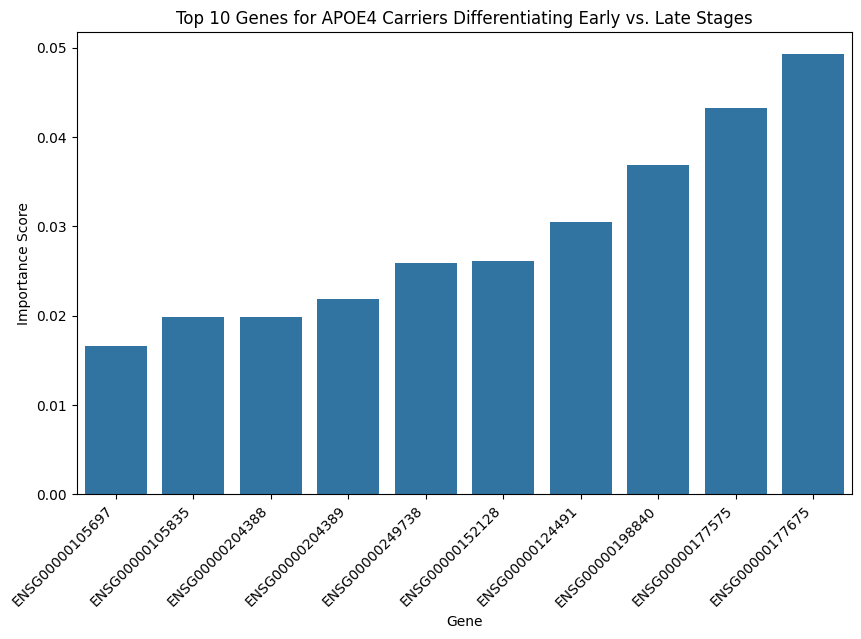


Classification Report for APOE4 Non-Carriers:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      6581
           1       0.89      0.95      0.92      6539

    accuracy                           0.92     13120
   macro avg       0.92      0.92      0.91     13120
weighted avg       0.92      0.92      0.91     13120

Top genes associated with stage progression for APOE4 Non-Carriers:
['ENSG00000115956' 'ENSG00000204389' 'ENSG00000118785' 'ENSG00000231535'
 'ENSG00000176728' 'ENSG00000120694' 'ENSG00000105697' 'ENSG00000198840'
 'ENSG00000059804' 'ENSG00000152128']


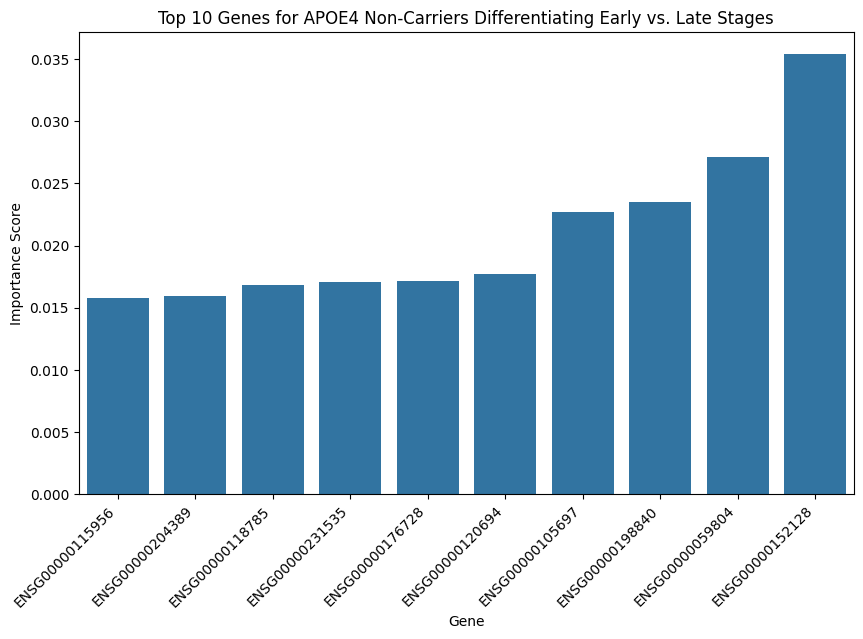

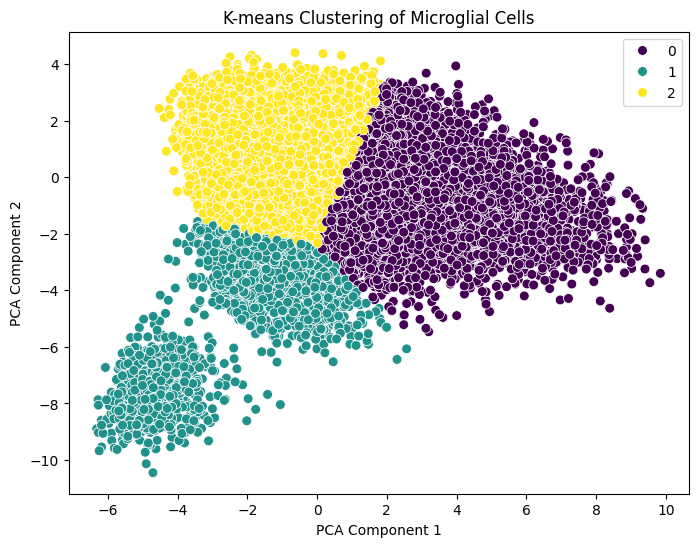

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and Filter the Dataset
adata = adata_mtg_filtered  # Assuming 'adata_mtg_filtered' is pre-loaded with the necessary data

# Step 2: Select highly variable genes (feature selection)
sc.pp.highly_variable_genes(adata, n_top_genes=300)
adata = adata[:, adata.var['highly_variable']]

# Step 3: Define early and late stage groups based on Braak stages (excluding 'Reference')
adata = adata[adata.obs['Braak stage'] != 'Reference']
adata.obs['Stage'] = adata.obs['Braak stage'].apply(lambda x: 0 if x in ['Braak 0', 'Braak II', 'Braak III'] else 1)  # 0 = Early, 1 = Late

# Step 4: Split data for APOE4 carriers and non-carriers
carriers = adata[adata.obs['APOE4 status'] == 'Y']
non_carriers = adata[adata.obs['APOE4 status'] == 'N']

# Step 5: Prepare data and labels for classification
def prepare_data(adata):
    X = adata.X.toarray()  # Assuming sparse matrix format, convert to dense if needed
    y = adata.obs['Stage'].values
    return X, y

X_carriers, y_carriers = prepare_data(carriers)
X_non_carriers, y_non_carriers = prepare_data(non_carriers)

# Step 6: Address Class Imbalance Using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_carriers_resampled, y_carriers_resampled = smote.fit_resample(X_carriers, y_carriers)
X_non_carriers_resampled, y_non_carriers_resampled = smote.fit_resample(X_non_carriers, y_non_carriers)

# Step 7: Train-Test Split
X_train_carriers, X_test_carriers, y_train_carriers, y_test_carriers = train_test_split(X_carriers_resampled, y_carriers_resampled, test_size=0.3, random_state=42)
X_train_non_carriers, X_test_non_carriers, y_train_non_carriers, y_test_non_carriers = train_test_split(X_non_carriers_resampled, y_non_carriers_resampled, test_size=0.3, random_state=42)

# Step 8: Train Random Forest Classifier with Balanced Class Weights
def train_evaluate_rf(X_train, X_test, y_train, y_test, label):
    class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

    rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights_dict)
    rf.fit(X_train, y_train)

    # Predictions and Evaluation
    y_pred = rf.predict(X_test)
    print(f"\nClassification Report for {label}:")
    print(classification_report(y_test, y_pred))

    # Feature importance
    feature_importances = rf.feature_importances_
    important_genes = np.array(adata.var_names)[np.argsort(feature_importances)[-10:]]  # Top 10 genes
    print(f"Top genes associated with stage progression for {label}:")
    print(important_genes)

    # Plot feature importance for top genes
    plt.figure(figsize=(10, 6))
    sns.barplot(x=important_genes, y=feature_importances[np.argsort(feature_importances)[-10:]])
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("Gene")
    plt.ylabel("Importance Score")
    plt.title(f"Top 10 Genes for {label} Differentiating Early vs. Late Stages")
    plt.show()

# Step 9: Run model for both APOE4 carriers and non-carriers
train_evaluate_rf(X_train_carriers, X_test_carriers, y_train_carriers, y_test_carriers, "APOE4 Carriers")
train_evaluate_rf(X_train_non_carriers, X_test_non_carriers, y_train_non_carriers, y_test_non_carriers, "APOE4 Non-Carriers")

# Step 10: Clustering Analysis to Identify Subpopulations
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(adata.X.toarray())

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Plot the clustering results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering of Microglial Cells')
plt.show()




#### Data Preparation and Feature Selection
- **Dataset**: The filtered dataset included microglial cells across Braak stages 0, II, III (early) and Braak IV, V, VI (late), excluding reference samples.
- **Highly Variable Genes**: Selected top 300 highly variable genes for feature selection.
- **Groups**: Data split into APOE4 carriers and non-carriers, further classified into early vs. late stage AD.
- **Class Balancing**: Applied SMOTE to address class imbalance between early and late stages.

#### Model Training and Evaluation
- **Classifier**: Random Forest classifier trained with balanced class weights.
- **Accuracy**: High accuracy observed for both carriers (98%) and non-carriers (92%).
- **Top Genes Identified**:
  - **APOE4 Carriers**: Top genes include HAMP, TMEM163, and F13A1, among others.
  - **APOE4 Non-Carriers**: Top genes include ENSG00000115956 (PLEK), ENSG00000152128 (TMEM163), and ENSG00000105697 (HAMP), among others.

#### Clustering Analysis
- **PCA and K-means Clustering**: Applied PCA for dimensionality reduction and K-means clustering to identify subpopulations of microglial cells.
- **Results**: Three clusters were identified, indicating distinct cellular subpopulations with potentially different roles in AD progression.

#### Interpretation of Results
- **APOE4 Carriers**: The Random Forest model effectively distinguished between early and late AD stages, highlighting key genes like HAMP, TMEM163, and F13A1 involved in inflammatory and neurotoxic processes.
- **APOE4 Non-Carriers**: The model also showed high accuracy for non-carriers, identifying genes such as PLEK, TMEM163, and HAMP linked to disease progression, suggesting that non-APOE4 pathways influence AD.
- **Clustering**: K-means clustering identified three distinct microglial subpopulations, indicating varying microglial phenotypes that may transition from neuroprotective to neurotoxic roles during AD progression.

#### Conclusion
The analysis highlights specific genes associated with AD stage progression, with a clear distinction between APOE4 carriers and non-carriers. Clustering analysis provides further insights into the heterogeneity of microglial activation, underlining the complexity of AD pathology.


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_highly_variable_genes.py:696: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["hvg"] = {"flavor": flavor}



Classification Report for APOE4 Carriers:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       203
           1       0.94      0.96      0.95      3425

    accuracy                           0.91      3628
   macro avg       0.47      0.48      0.48      3628
weighted avg       0.89      0.91      0.90      3628

Top genes associated with stage progression for APOE4 Carriers:
['ENSG00000117115' 'ENSG00000105697' 'ENSG00000118785' 'ENSG00000152128'
 'ENSG00000167996' 'ENSG00000124491' 'ENSG00000198840' 'ENSG00000177575'
 'ENSG00000177675' 'ENSG00000285534']


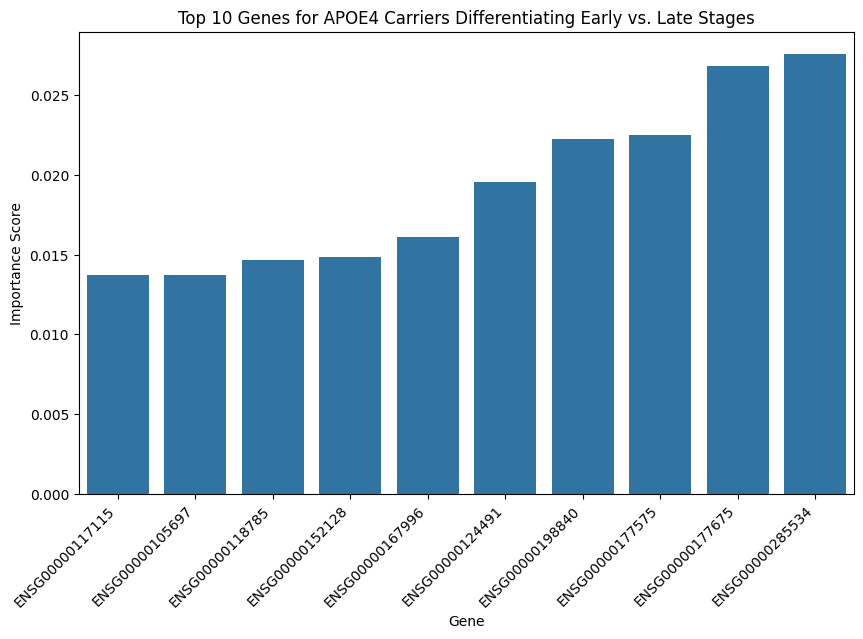


Classification Report for APOE4 Non-Carriers:
              precision    recall  f1-score   support

           0       0.22      0.15      0.18      3607
           1       0.63      0.73      0.68      7162

    accuracy                           0.54     10769
   macro avg       0.42      0.44      0.43     10769
weighted avg       0.49      0.54      0.51     10769

Top genes associated with stage progression for APOE4 Non-Carriers:
['ENSG00000059804' 'ENSG00000117115' 'ENSG00000122862' 'ENSG00000167996'
 'ENSG00000152208' 'ENSG00000285534' 'ENSG00000080824' 'ENSG00000118785'
 'ENSG00000152128' 'ENSG00000198840']


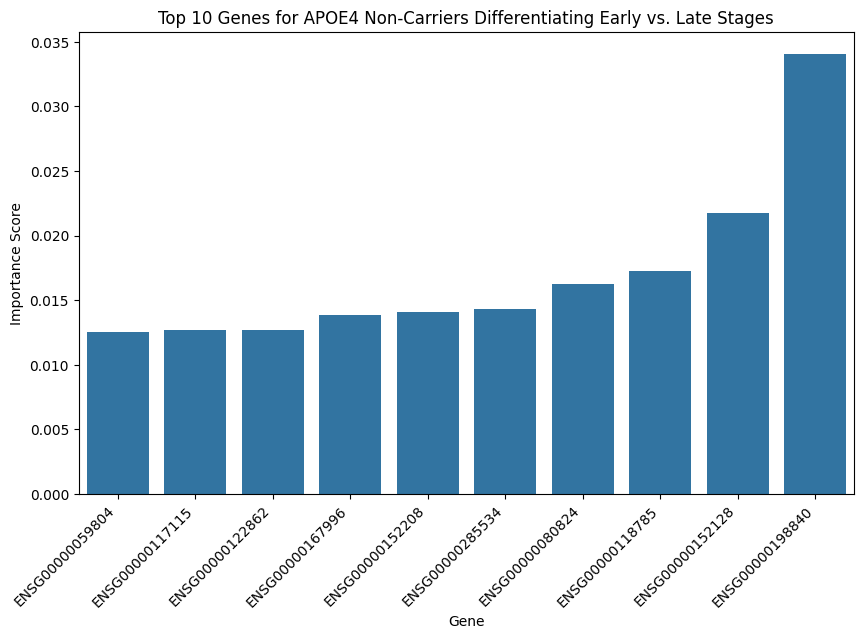

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select highly variable genes (feature selection)
sc.pp.highly_variable_genes(adata_mtg_filtered, n_top_genes=300)
adata = adata_mtg_filtered[:, adata_mtg_filtered.var['highly_variable']]

# Step 2: Define early and late stage groups for APOE4 carriers and non-carriers
early_stage_carriers = adata[
    (adata.obs['APOE4 status'] == 'Y') &
    (
        (adata.obs['ADNC'] == 'Low') |
        (adata.obs['Braak stage'].isin(['Braak 0', 'Braak II', 'Braak III'])) |
        (adata.obs['Thal phase'].isin(['Thal 0', 'Thal 1', 'Thal 2']))
    )
]

late_stage_carriers = adata[
    (adata.obs['APOE4 status'] == 'Y') &
    (
        adata.obs['ADNC'].isin(['Intermediate', 'High']) |
        (adata.obs['Braak stage'].isin(['Braak IV', 'Braak V', 'Braak VI'])) |
        (adata.obs['Thal phase'].isin(['Thal 3', 'Thal 4', 'Thal 5']))
    )
]

early_stage_non_carriers = adata[
    (adata.obs['APOE4 status'] == 'N') &
    (
        (adata.obs['ADNC'] == 'Low') |
        (adata.obs['Braak stage'].isin(['Braak 0', 'Braak II', 'Braak III'])) |
        (adata.obs['Thal phase'].isin(['Thal 0', 'Thal 1', 'Thal 2']))
    )
]

late_stage_non_carriers = adata[
    (adata.obs['APOE4 status'] == 'N') &
    (
        adata.obs['ADNC'].isin(['Intermediate', 'High']) |
        (adata.obs['Braak stage'].isin(['Braak IV', 'Braak V', 'Braak VI'])) |
        (adata.obs['Thal phase'].isin(['Thal 3', 'Thal 4', 'Thal 5']))
    )
]

# Step 3: Prepare data and labels for classification
def prepare_data(early, late):
    X = np.vstack([early.X.toarray(), late.X.toarray()])  # Assuming sparse matrix format, convert to dense if needed
    y = np.array([0] * early.shape[0] + [1] * late.shape[0])  # 0 = Early, 1 = Late
    return X, y

X_carriers, y_carriers = prepare_data(early_stage_carriers, late_stage_carriers)
X_non_carriers, y_non_carriers = prepare_data(early_stage_non_carriers, late_stage_non_carriers)

# Step 4: Train and evaluate model for carriers and non-carriers
def train_evaluate_rf(X, y, label):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Predictions and Evaluation
    y_pred = rf.predict(X_test)
    print(f"\nClassification Report for {label}:")
    print(classification_report(y_test, y_pred))

    # Feature importance
    feature_importances = rf.feature_importances_
    important_genes = np.array(adata.var_names)[np.argsort(feature_importances)[-10:]]  # Top 10 genes
    print(f"Top genes associated with stage progression for {label}:")
    print(important_genes)

    # Plot feature importance for top genes
    plt.figure(figsize=(10, 6))
    sns.barplot(x=important_genes, y=feature_importances[np.argsort(feature_importances)[-10:]])
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("Gene")
    plt.ylabel("Importance Score")
    plt.title(f"Top 10 Genes for {label} Differentiating Early vs. Late Stages")
    plt.show()

# Run model for both APOE4 carriers and non-carriers
train_evaluate_rf(X_carriers, y_carriers, "APOE4 Carriers")
train_evaluate_rf(X_non_carriers, y_non_carriers, "APOE4 Non-Carriers")


## Interpretation of the Results
Top Differentially Expressed (DE) Genes for APOE4 Carriers (Late Stage vs Early Stage)

Lack of Significant Findings: The table for APOE4 carriers shows that all genes have a p-value of 1.0, and most genes have a NaN (Not a Number) log fold change. This indicates that there were no significant differential expressions detected between the late and early stages for APOE4 carriers. This may suggest that the gene expression profiles for APOE4 carriers do not differ meaningfully as Alzheimer's disease progresses from early to late stages.

Implications for APOE4 Carriers: The absence of significant differentially expressed genes in APOE4 carriers might indicate a more stable or uniform expression pattern across disease stages, or it could reflect that the activation of microglial cells may not shift as drastically in carriers compared to non-carriers. This result could prompt further investigation into the biological mechanisms at play, as it contradicts expectations of increased neurotoxic expression in late stages.

Top Differentially Expressed (DE) Genes for APOE4 Non-Carriers (Late Stage vs Early Stage)

Significant Findings: In contrast, the results for APOE4 non-carriers demonstrate clear and significant differential expression. For instance, genes like MT-ND3 and MT-ATP6 have substantial log fold changes (3.51 and 2.42, respectively) along with extremely low p-values (p < 1e-244 and p < 1e-179). These values indicate a strong statistical significance and suggest that these genes are notably upregulated in late-stage non-carriers compared to early-stage individuals.

Biological Significance: The differentially expressed genes such as MT-ND3, MT-ATP6, and FKBP5 are associated with mitochondrial function and stress responses. The upregulation of these genes in late-stage non-carriers may reflect increased oxidative stress and mitochondrial dysfunction that often accompany advanced Alzheimer's pathology.

Neuroprotective vs. Neurotoxic Roles: The significant shifts in gene expression for non-carriers imply that microglial cells may exhibit a transition from protective roles to potentially harmful ones as the disease advances. The findings align with the hypothesis that microglial activation contributes to neurodegeneration in late stages, particularly in those who do not carry the APOE4 allele.

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


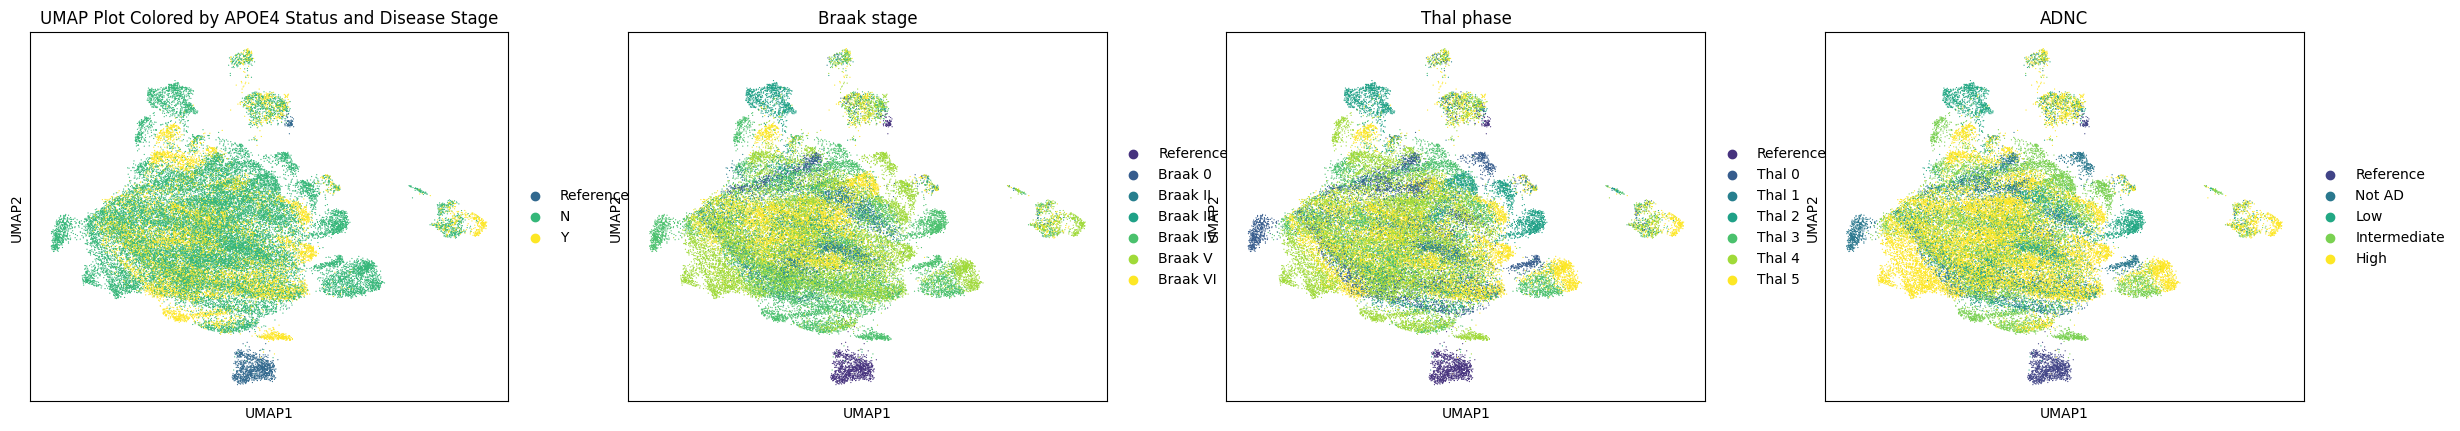

In [ ]:
import scanpy as sc

# Compute PCA and UMAP
sc.tl.pca(adata_mtg_filtered)
sc.pp.neighbors(adata_mtg_filtered)
sc.tl.umap(adata_mtg_filtered)

# Plot UMAP
sc.pl.umap(adata_mtg_filtered, color=['APOE4 status', 'Braak stage', 'Thal phase', 'ADNC'],
           title="UMAP Plot Colored by APOE4 Status and Disease Stage")


**APOE4 Status (First Plot):**

The UMAP plot illustrates the distribution of microglial cells based on APOE4 status (Y for carriers, N for non-carriers, and a reference group).
Clusters: If there are distinct clusters for carriers and non-carriers, this suggests that the microglial cell populations differ significantly in their expression profiles based on APOE4 status.
Distribution: The presence of overlapping areas indicates that there may be shared characteristics among carriers and non-carriers, or potential transitional states in microglial activation.

**Braak Stage (Second Plot):**

This plot shows how microglial cells cluster according to the Braak stage, a measure of the progression of neurofibrillary tangles in AD.
Progression Indicator: Distinct groups for different Braak stages imply that microglial activation varies significantly as the disease progresses, with later stages potentially showing different activation patterns.
Color Gradation: If there is a smooth gradient from early to late Braak stages, it suggests a continuum of activation states in microglia in response to disease progression.

**Thal Phase (Third Plot):**

The Thal phase reflects the extent of amyloid pathology in the brain. Similar to the Braak stage, this plot indicates how microglial cells cluster based on this measure.
Clustering Patterns: The arrangement of microglial cells in relation to Thal phases can provide insight into how amyloid pathology influences microglial behavior.
Overlapping Clusters: The presence of overlapping clusters across Thal phases may indicate that some microglial cells retain similar characteristics despite differing degrees of amyloid burden.

**ADNC (Fourth Plot):**

ADNC categorizes the microglial cells based on their cognitive status, ranging from "Not AD" to various stages of Alzheimer's severity (Low, Intermediate, High).
Cognitive Decline Representation: A clear separation of clusters corresponding to ADNC status suggests that microglial activation is influenced by cognitive decline severity.
Correlation with Other Stages: Comparing this plot with the Braak stage and Thal phase plots may reveal how cognitive impairment relates to microglial activation patterns across different stages of pathology.

**Insights:**
- Microglial Activation Shifts: The results indicate that microglial activation may shift based on both genetic (APOE4 status) and pathological (Braak and Thal stages, ADNC status) factors.

- Potential Targets for Therapy: Understanding how microglial activation varies across these parameters could help identify potential therapeutic targets in Alzheimer's disease treatment, especially for APOE4 carriers who may be at greater risk for neurodegeneration.


Check for Interaction Effect of APOE4 Carrier Status:

In [ ]:
from statsmodels.formula.api import logit
import pandas as pd

# Prepare the dataset
df = pd.DataFrame(metadata_encoded)
df['APOE4_status'] = filtered_adata.obs['APOE4 status'].apply(lambda x: 1 if x == 'Y' else 0)
df['Stage'] = filtered_adata.obs['Stage']

# Ensure gene_expression has a second dimension by reshaping if necessary.
# If gene_expression is not already 2D, reshape it accordingly.
if gene_expression.ndim == 1:
    gene_expression = gene_expression.reshape(-1, 1)

# Create a list of column names for the genes
gene_names = ['Gene_' + str(i) for i in range(gene_expression.shape[1])]

# Convert gene_expression to DataFrame with appropriate column names
gene_df = pd.DataFrame(gene_expression, columns=gene_names)

# Combine metadata and gene expression data
df = pd.concat([df, gene_df], axis=1)

# Interaction effect analysis using logistic regression
interaction_model = logit('Stage ~ APOE4_status + Gene_0 + APOE4_status:Gene_0', data=df).fit()
print(interaction_model.summary())


IndexError: tuple index out of range